# Credit Risk Customer Classification Project

##Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler,  OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, RepeatedStratifiedKFold, ShuffleSplit, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

##Load Dataset

In [2]:
!gdown --id "19olO2TEhXwNs0N_O6HQ162kOgW9lGBRT"

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=19olO2TEhXwNs0N_O6HQ162kOgW9lGBRT
To: /content/Credit Risk Dataset.zip
100% 18.7k/18.7k [00:00<00:00, 25.0MB/s]


In [3]:
!unzip "Credit Risk Dataset.zip" -d "/content/Credit Risk Dataset"

Archive:  Credit Risk Dataset.zip
  inflating: /content/Credit Risk Dataset/credit_customers.csv  


In [4]:
credit = pd.read_csv("/content/Credit Risk Dataset/credit_customers.csv")
credit.head(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
5,no checking,36.0,existing paid,education,9055.0,no known savings,1<=X<4,2.0,male single,none,...,no known property,35.0,none,for free,1.0,unskilled resident,2.0,yes,yes,good
6,no checking,24.0,existing paid,furniture/equipment,2835.0,500<=X<1000,>=7,3.0,male single,none,...,life insurance,53.0,none,own,1.0,skilled,1.0,none,yes,good
7,0<=X<200,36.0,existing paid,used car,6948.0,<100,1<=X<4,2.0,male single,none,...,car,35.0,none,rent,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
8,no checking,12.0,existing paid,radio/tv,3059.0,>=1000,4<=X<7,2.0,male div/sep,none,...,real estate,61.0,none,own,1.0,unskilled resident,1.0,none,yes,good
9,0<=X<200,30.0,critical/other existing credit,new car,5234.0,<100,unemployed,4.0,male mar/wid,none,...,car,28.0,none,own,2.0,high qualif/self emp/mgmt,1.0,none,yes,bad


##Data Understanding

Dilakukan pemahaman data dengan melakukan beberapa tahap yaitu data description dan EDA

###Data Description

####Mengubah Data Object

Melakukan pengecekan tipe data dan banyak variabel yang dimiliki

In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

Mengubah tipe data agar sesuai

In [6]:
#Mengubah Tipe Data
credit['checking_status'] = credit['checking_status'].astype('category')
credit['credit_history'] = credit['credit_history'].astype('category')
credit['purpose'] = credit['purpose'].astype('category')
credit['savings_status'] = credit['savings_status'].astype('category')
credit['employment'] = credit['employment'].astype('category')
credit['personal_status'] = credit['personal_status'].astype('category')
credit['other_parties'] = credit['other_parties'].astype('category')
credit['property_magnitude'] = credit['property_magnitude'].astype('category')
credit['other_payment_plans'] = credit['other_payment_plans'].astype('category')
credit['housing'] = credit['housing'].astype('category')
credit['job'] = credit['job'].astype('category')
credit['own_telephone'] = credit['own_telephone'].astype('category')
credit['foreign_worker'] = credit['foreign_worker'].astype('category')
credit['class'] = credit['class'].astype('category')
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   float64 
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   float64 
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   float64 
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   float64 
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

####Deskripsi Persebaran Data

Melihat persebaran data setiap variabel

In [7]:
credit.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


###Explanatory Data Analysis (EDA)

Melakukan ekplorasi untuk mengetahui karakteristik data

####Univariate Analysis

Analisis masing masing variabel

#####Bar Chart for Categorical data features

Visualisasi untuk data berkategori barchart

<ipython-input-8-711f76a6ac4c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=credit, x=credit[col], palette='Set1', width=0.6)  # Mengatur lebar bar


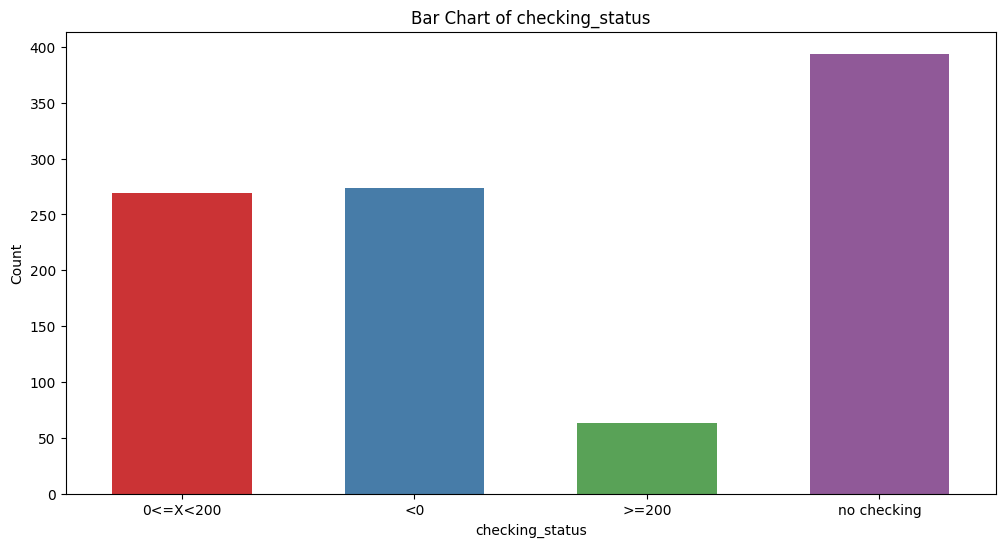

<ipython-input-8-711f76a6ac4c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=credit, x=credit[col], palette='Set1', width=0.6)  # Mengatur lebar bar


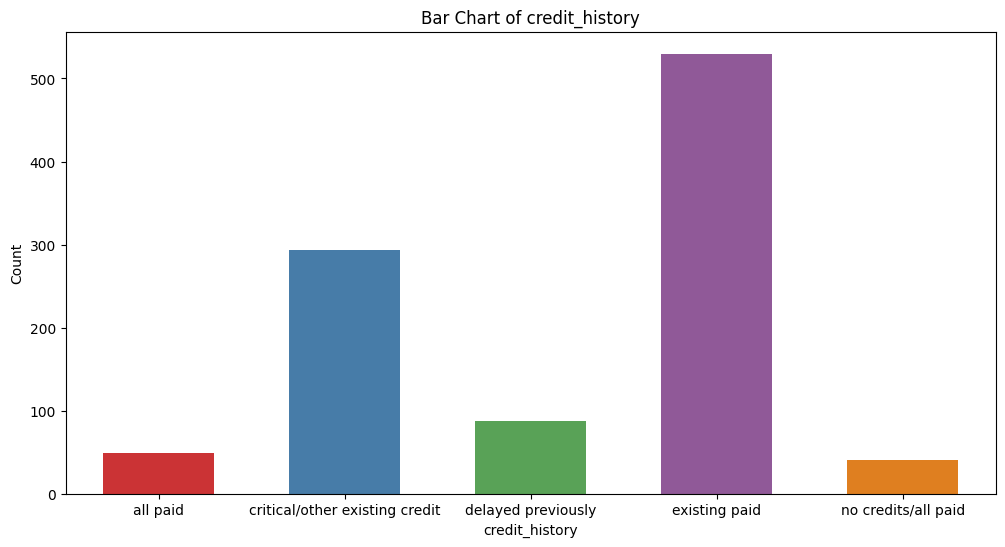

<ipython-input-8-711f76a6ac4c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=credit, x=credit[col], palette='Set1', width=0.6)  # Mengatur lebar bar


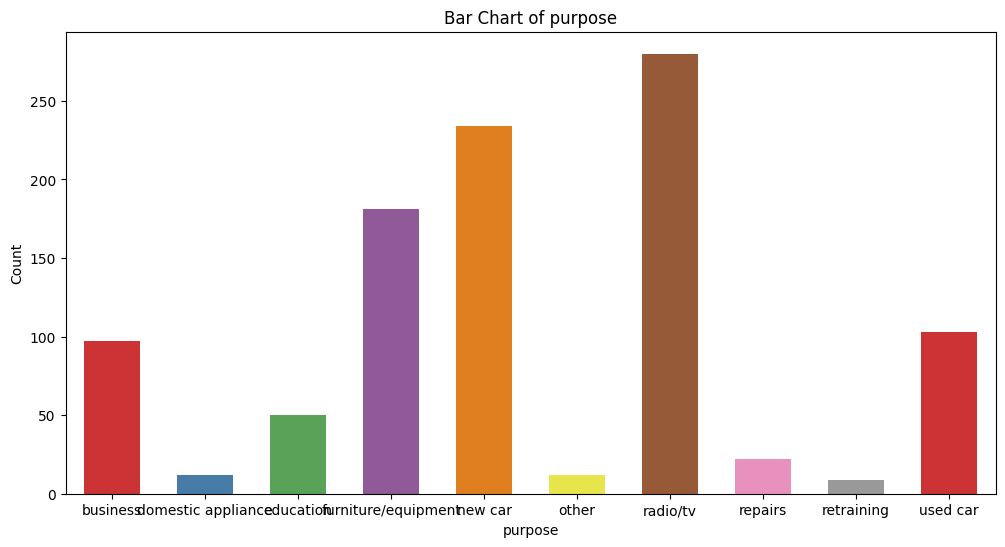

<ipython-input-8-711f76a6ac4c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=credit, x=credit[col], palette='Set1', width=0.6)  # Mengatur lebar bar


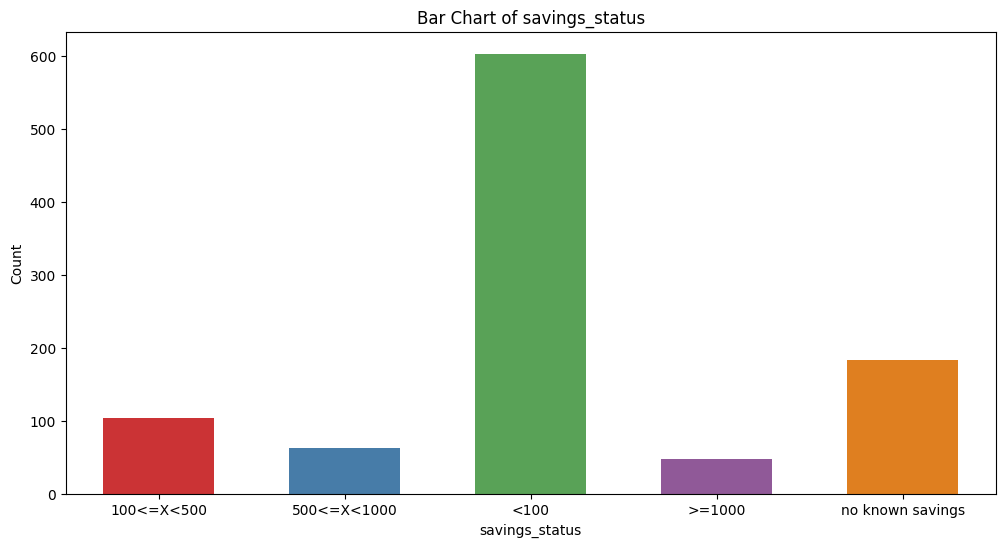

<ipython-input-8-711f76a6ac4c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=credit, x=credit[col], palette='Set1', width=0.6)  # Mengatur lebar bar


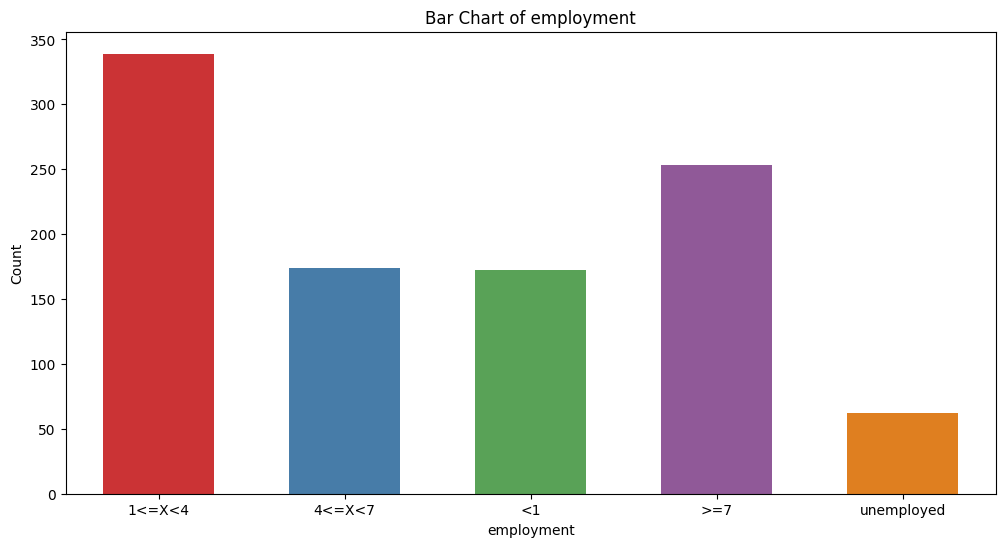

<ipython-input-8-711f76a6ac4c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=credit, x=credit[col], palette='Set1', width=0.6)  # Mengatur lebar bar


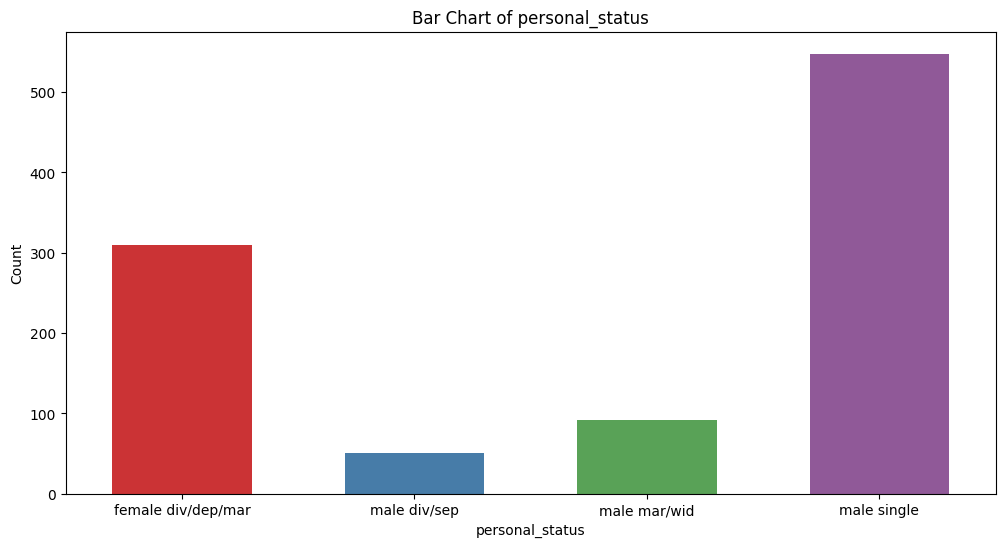

<ipython-input-8-711f76a6ac4c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=credit, x=credit[col], palette='Set1', width=0.6)  # Mengatur lebar bar


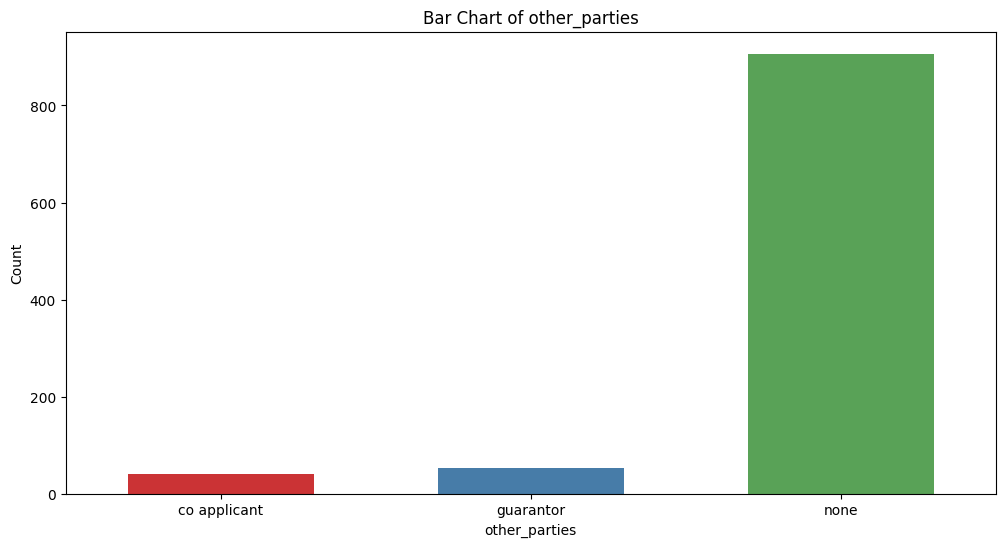

<ipython-input-8-711f76a6ac4c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=credit, x=credit[col], palette='Set1', width=0.6)  # Mengatur lebar bar


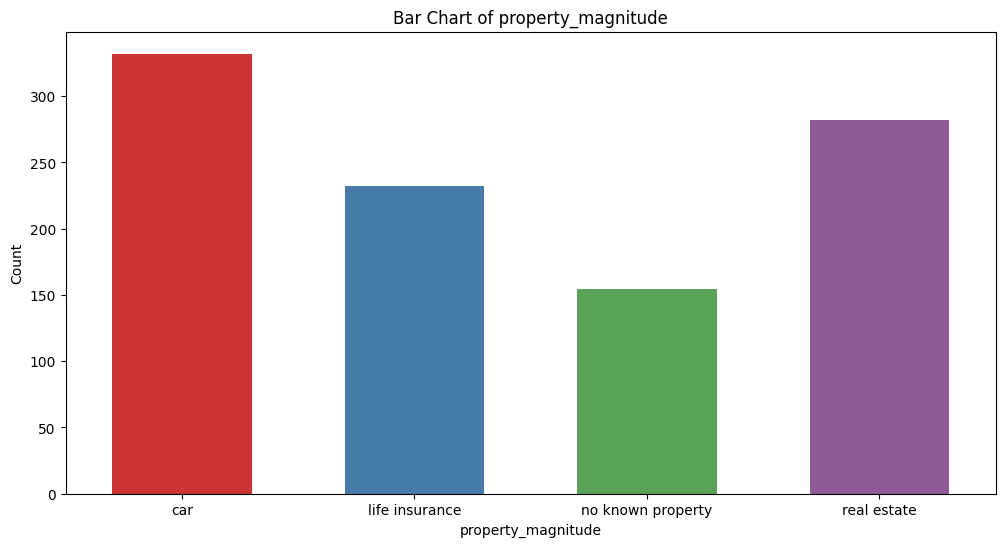

<ipython-input-8-711f76a6ac4c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=credit, x=credit[col], palette='Set1', width=0.6)  # Mengatur lebar bar


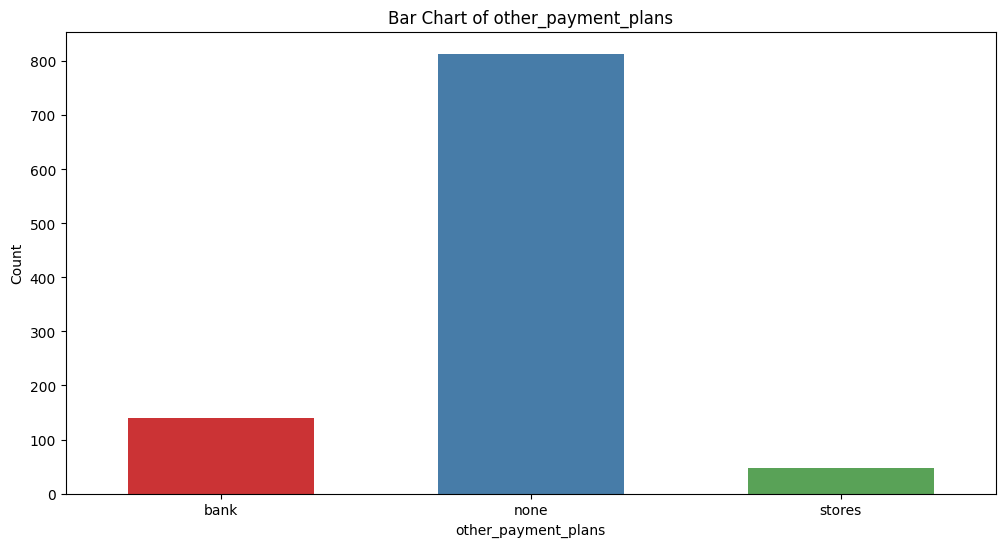

<ipython-input-8-711f76a6ac4c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=credit, x=credit[col], palette='Set1', width=0.6)  # Mengatur lebar bar


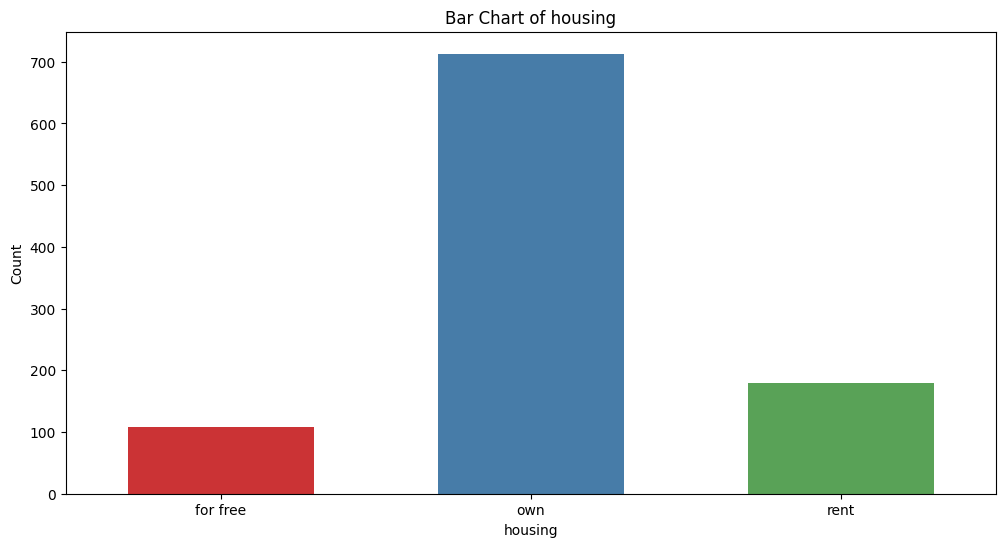

<ipython-input-8-711f76a6ac4c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=credit, x=credit[col], palette='Set1', width=0.6)  # Mengatur lebar bar


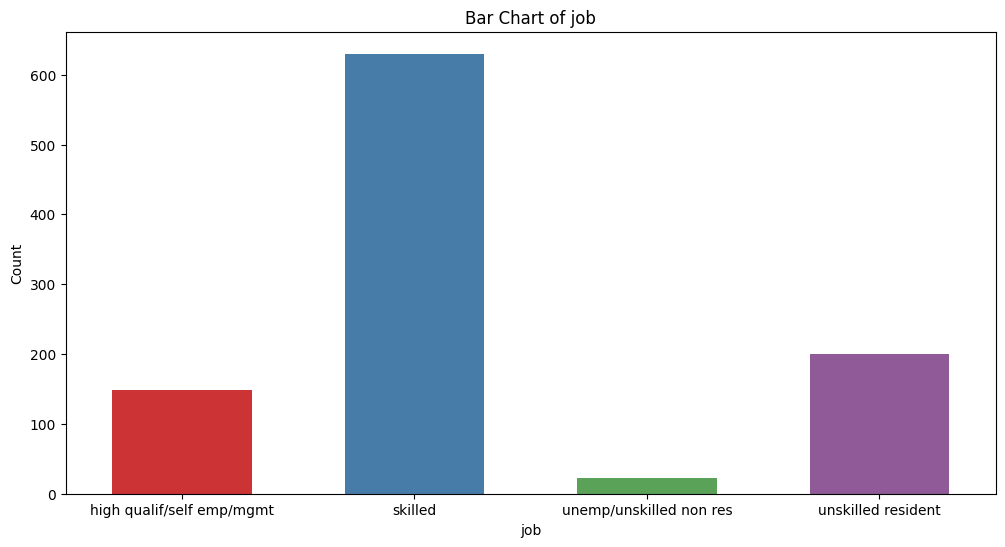

<ipython-input-8-711f76a6ac4c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=credit, x=credit[col], palette='Set1', width=0.6)  # Mengatur lebar bar


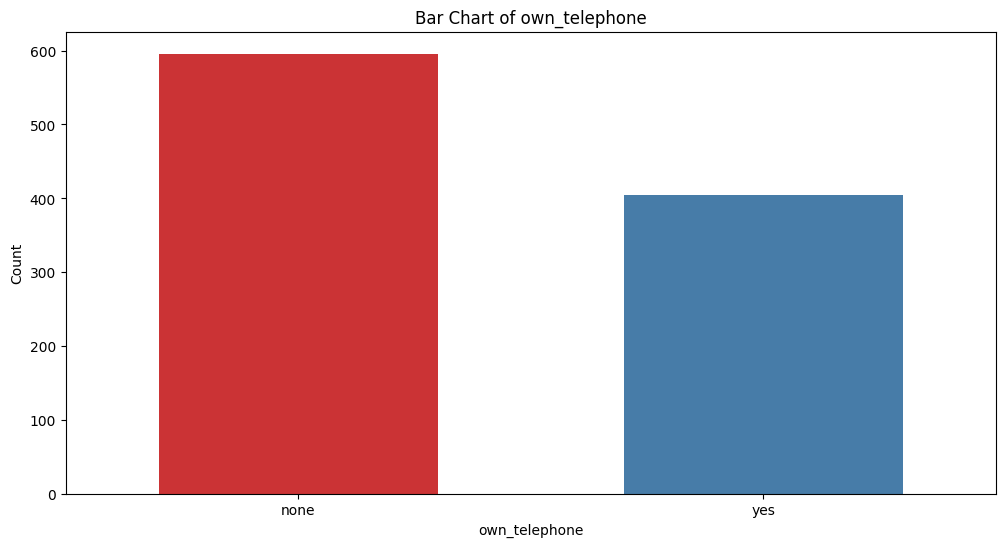

<ipython-input-8-711f76a6ac4c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=credit, x=credit[col], palette='Set1', width=0.6)  # Mengatur lebar bar


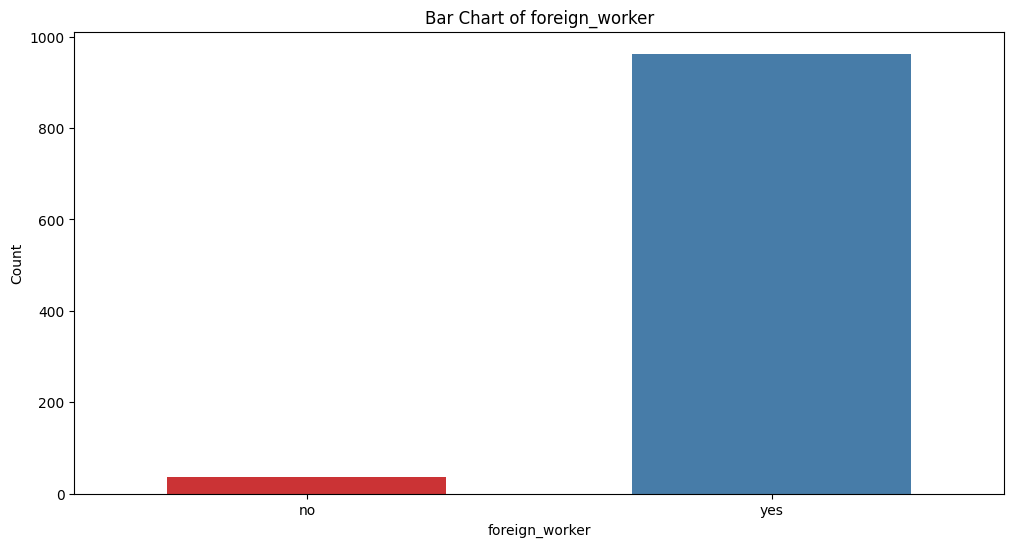

<ipython-input-8-711f76a6ac4c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=credit, x=credit[col], palette='Set1', width=0.6)  # Mengatur lebar bar


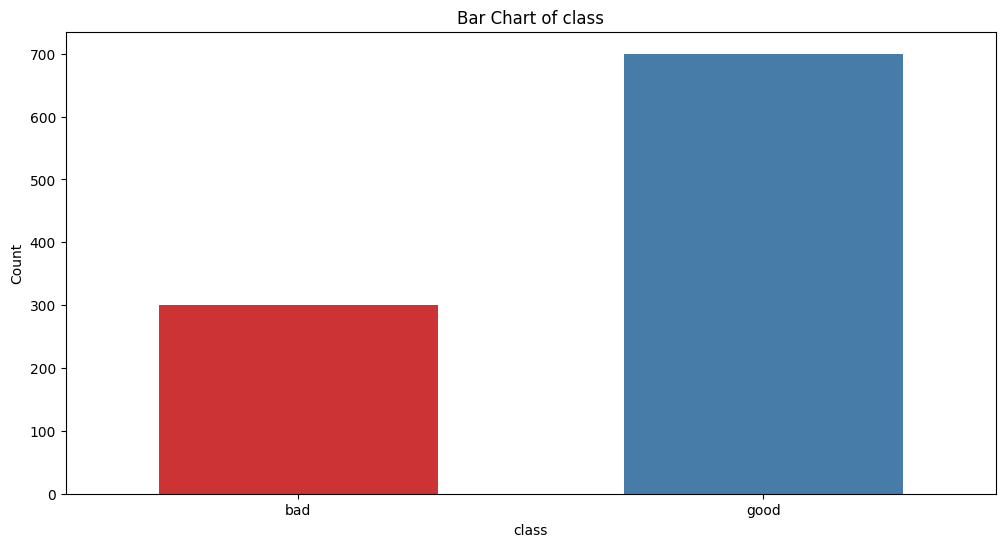

In [8]:
for col in credit.select_dtypes(include='category').columns:
    plt.figure(figsize=(12, 6))  # Mengatur ukuran figure
    sns.countplot(data=credit, x=credit[col], palette='Set1', width=0.6)  # Mengatur lebar bar
    plt.title(f"Bar Chart of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

#####Histogram untuk Numerical data features

Visualisasi untuk data numerical menggunakan histogram dan boxplot

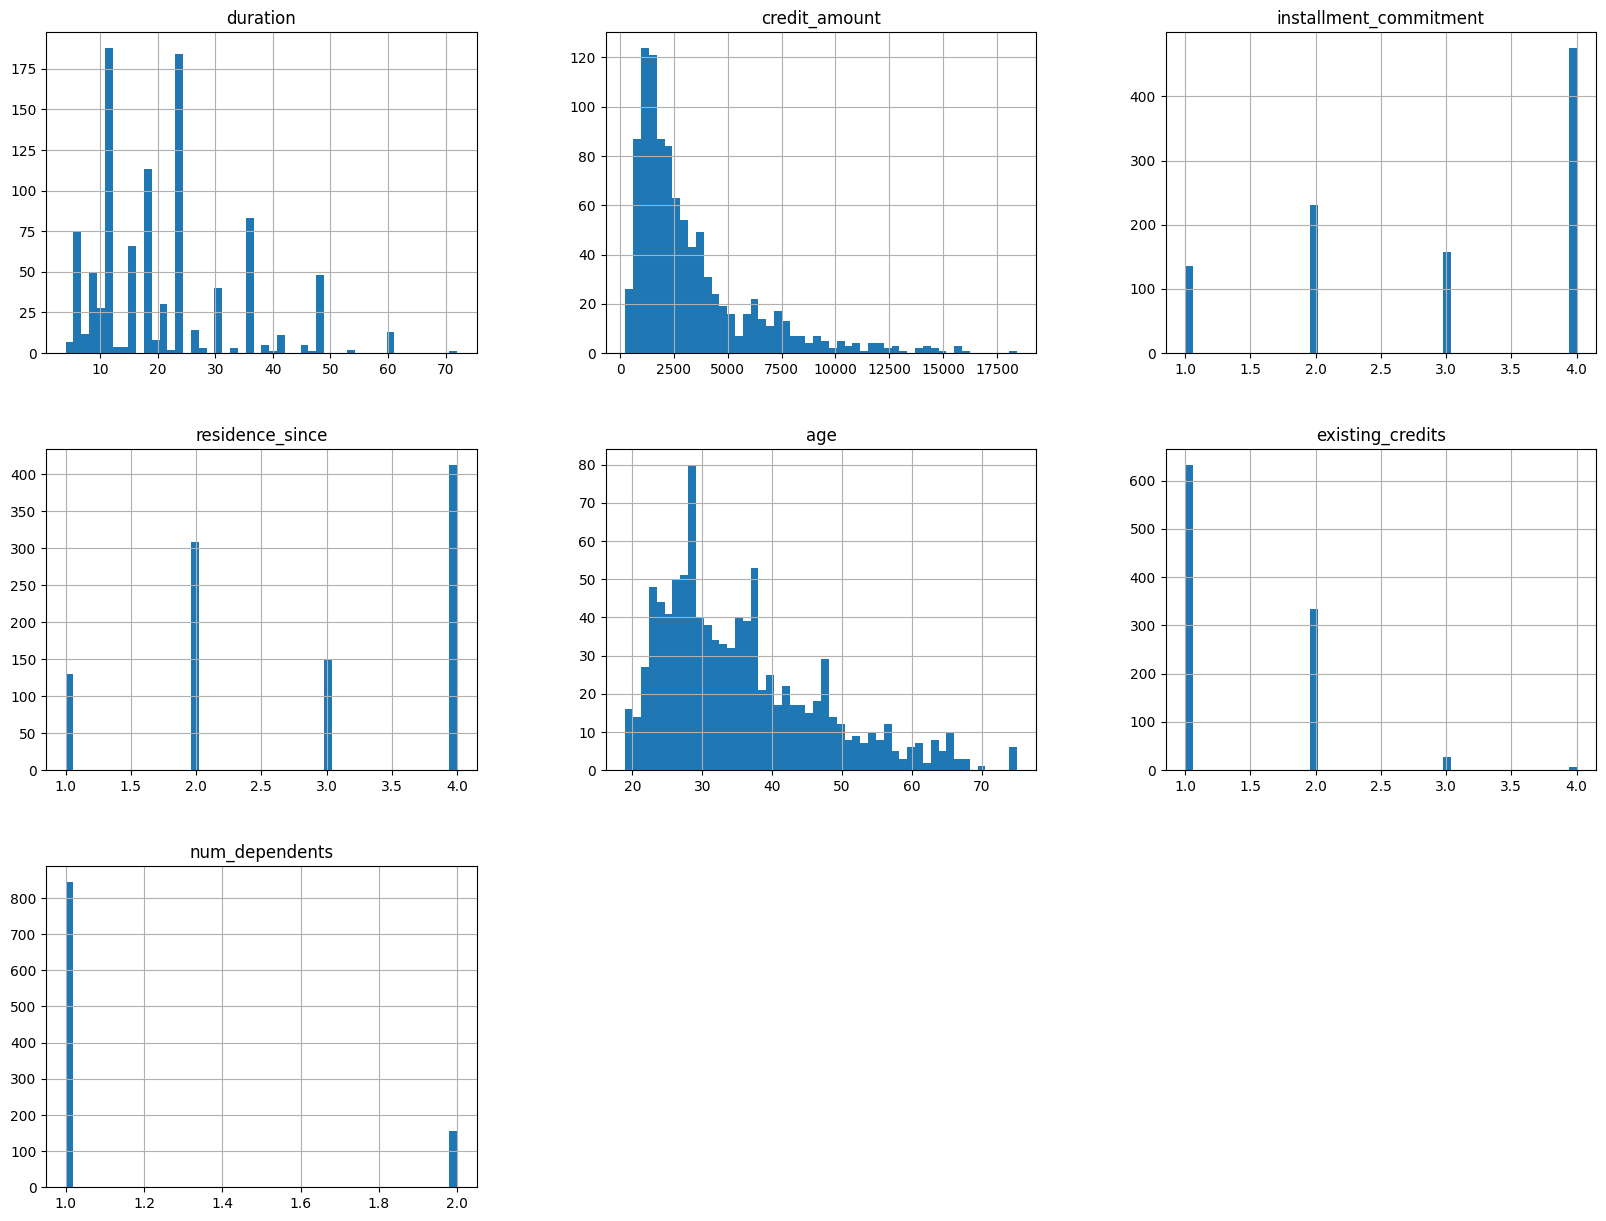

In [9]:
credit.hist(bins=50, figsize=(20,15))
plt.show()

#####Boxplot for Numerical Data Features

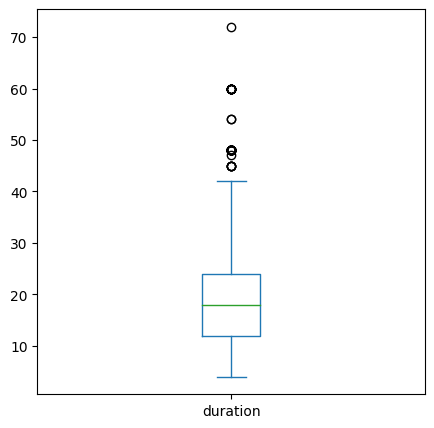

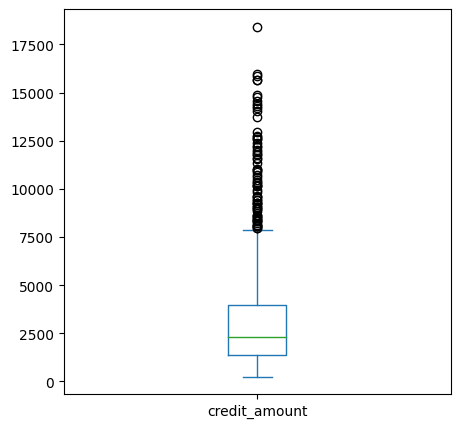

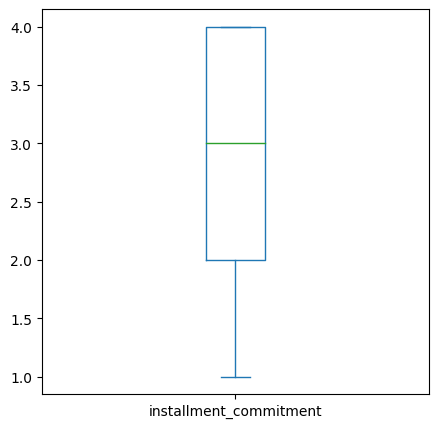

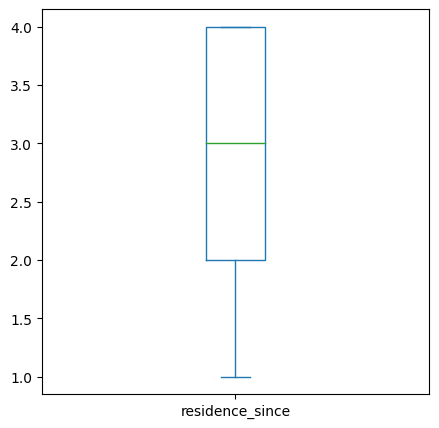

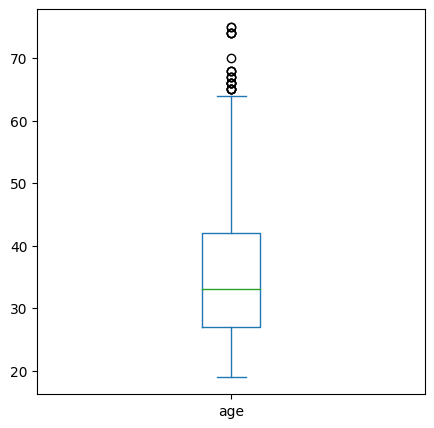

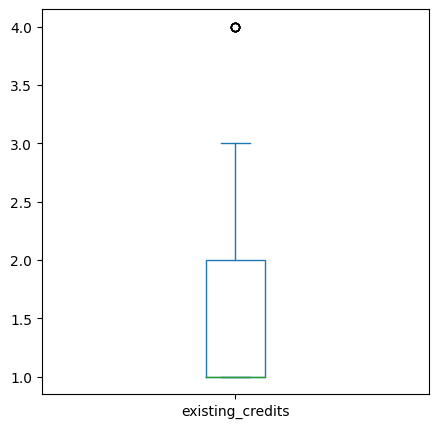

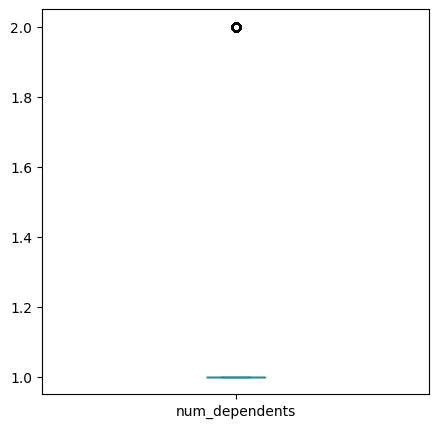

In [10]:
for col in credit.select_dtypes(include="number").columns:
  plt.figure(figsize = (5, 5))
  credit[col].plot(kind="box")
  plt.show()

####Multivariate Analysis

Analisis variabel satu dengan variabel lain yang bisa juga menggunakan variabel target class

#####Categorical Values

Visualisasi dengan categorical values menggunakan bar chart

<ipython-input-11-3b6d75b57caf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="class", kind="bar", dodge=False, height =4, aspect =3, data=credit, palette="Set3")
<ipython-input-11-3b6d75b57caf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="class", kind="bar", dodge=False, height =4, aspect =3, data=credit, palette="Set3")
<ipython-input-11-3b6d75b57caf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="class", kind="bar", dodge=False, height =4, aspect =3, data=credit, palette="Set3")
<ipython-input-11-3b6d

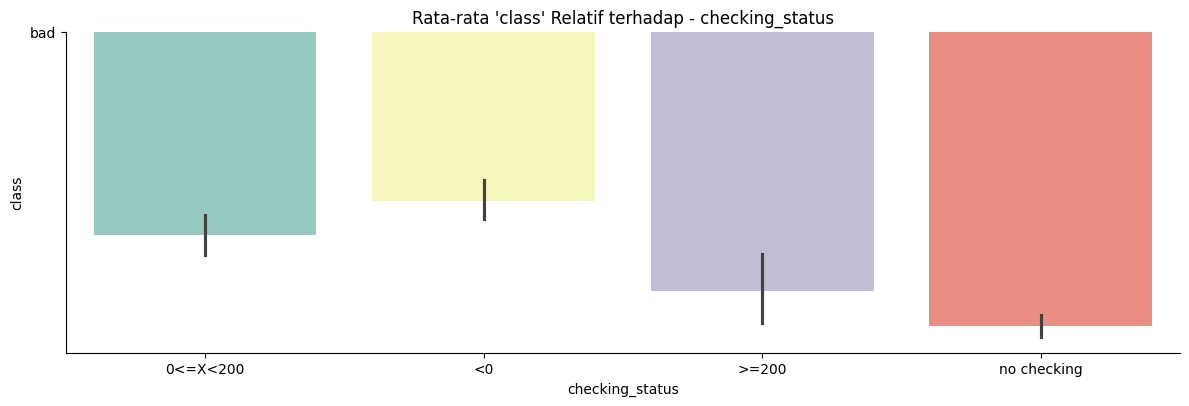

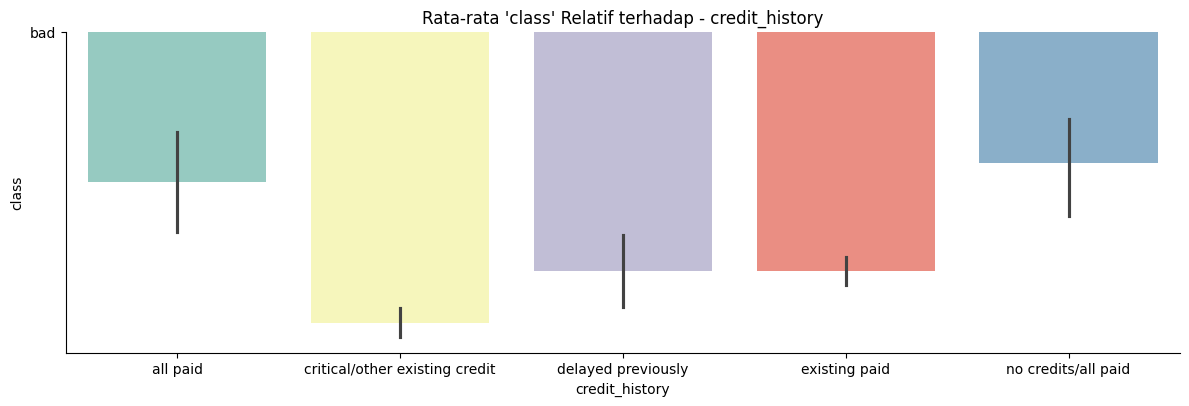

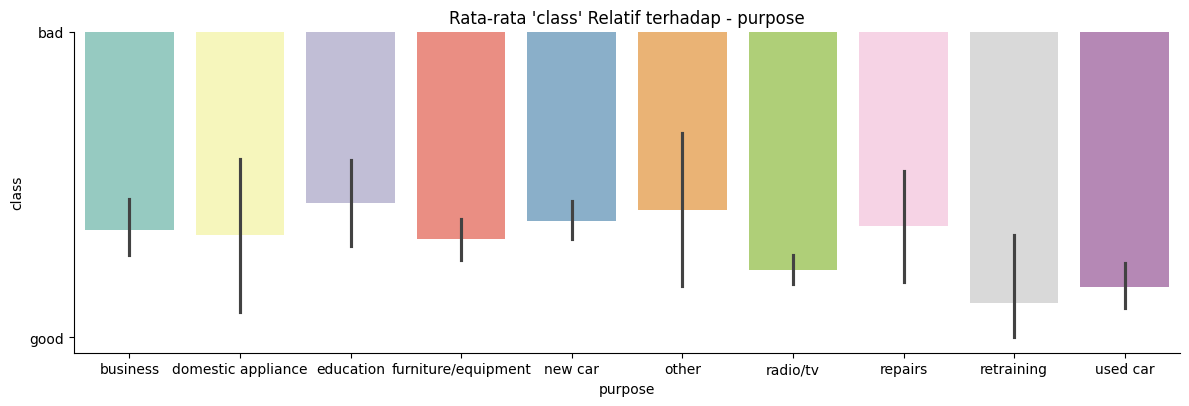

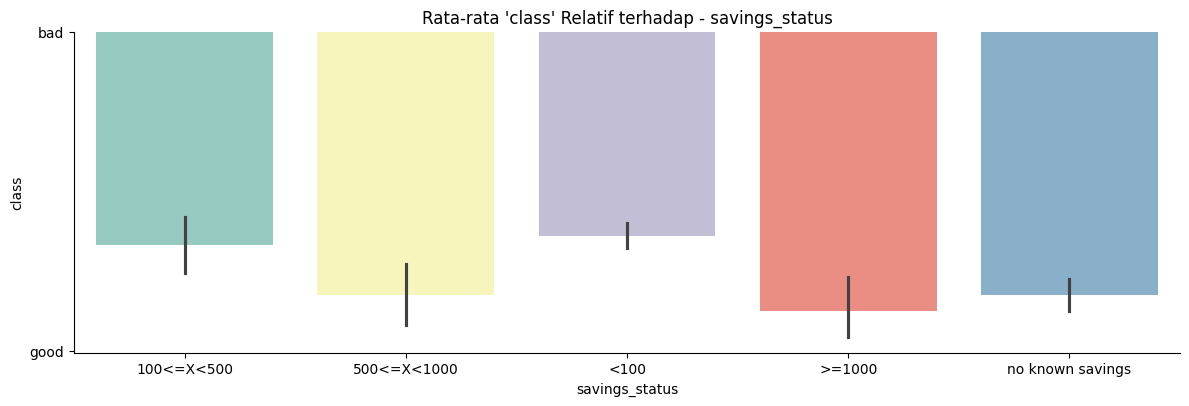

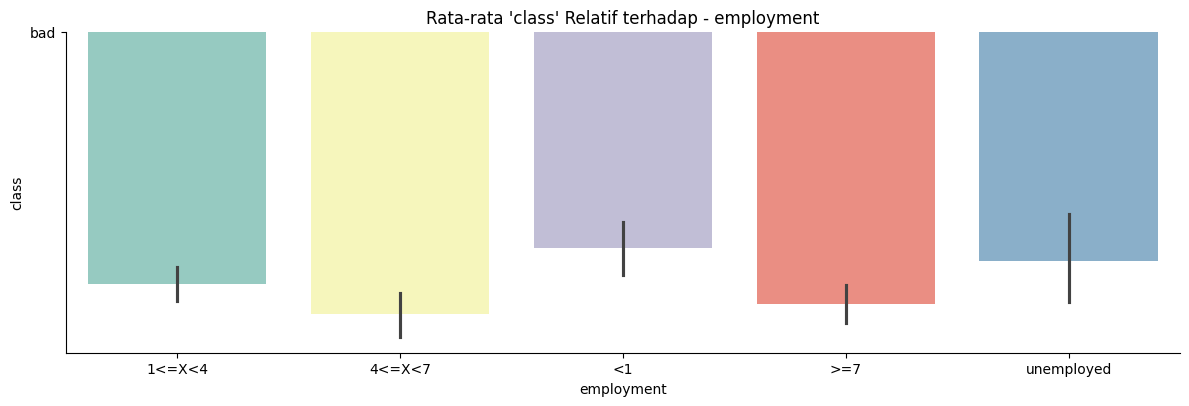

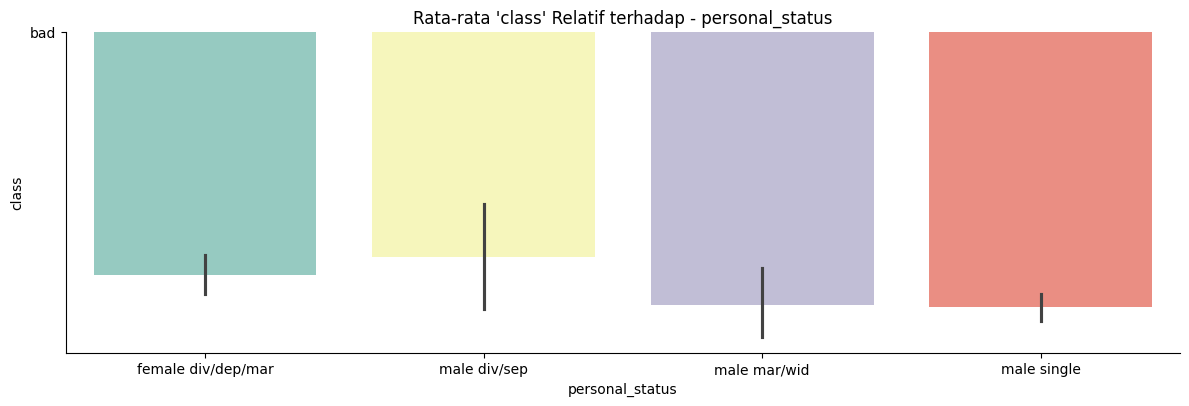

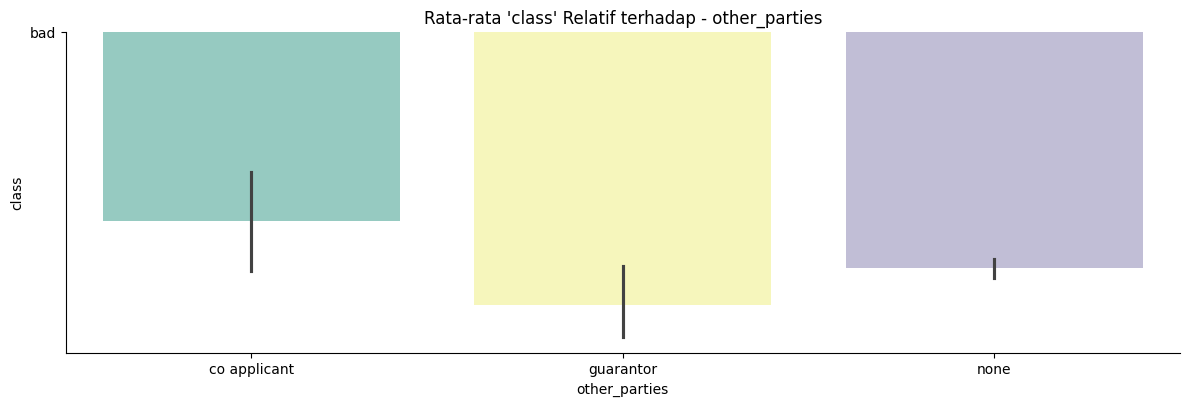

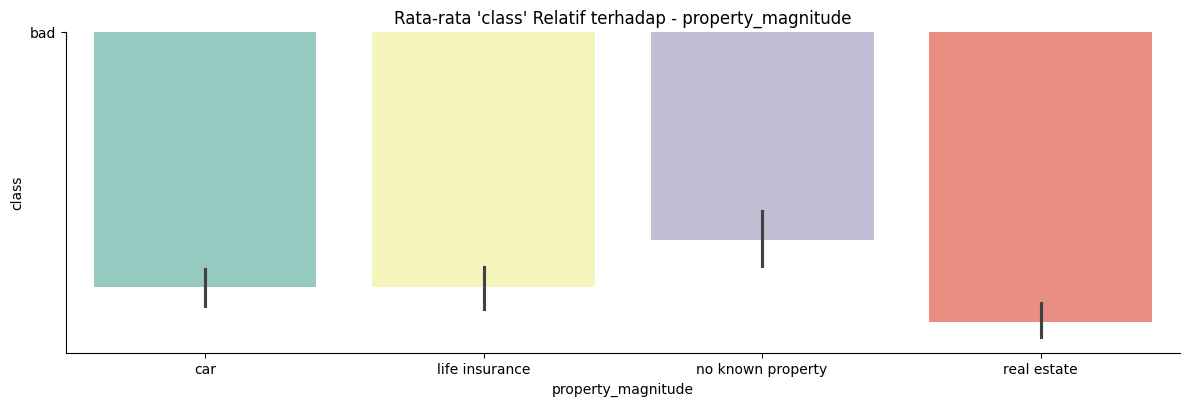

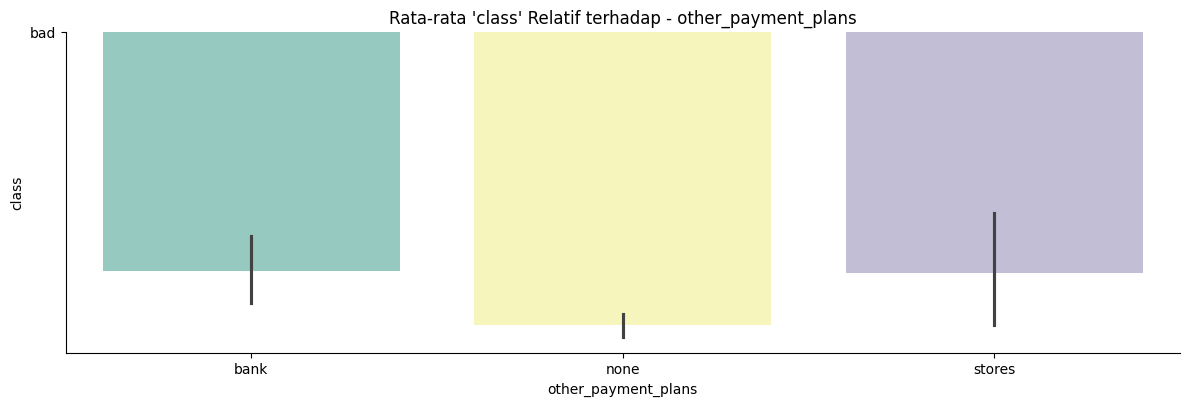

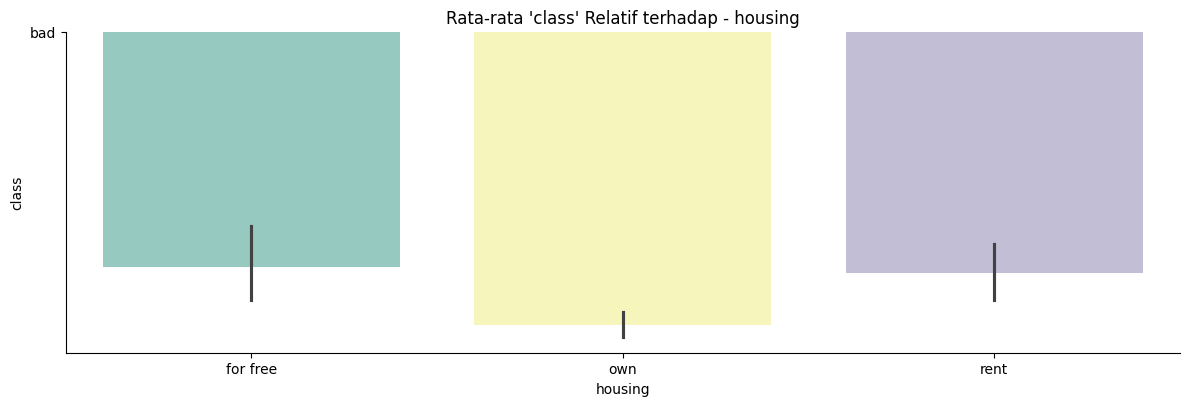

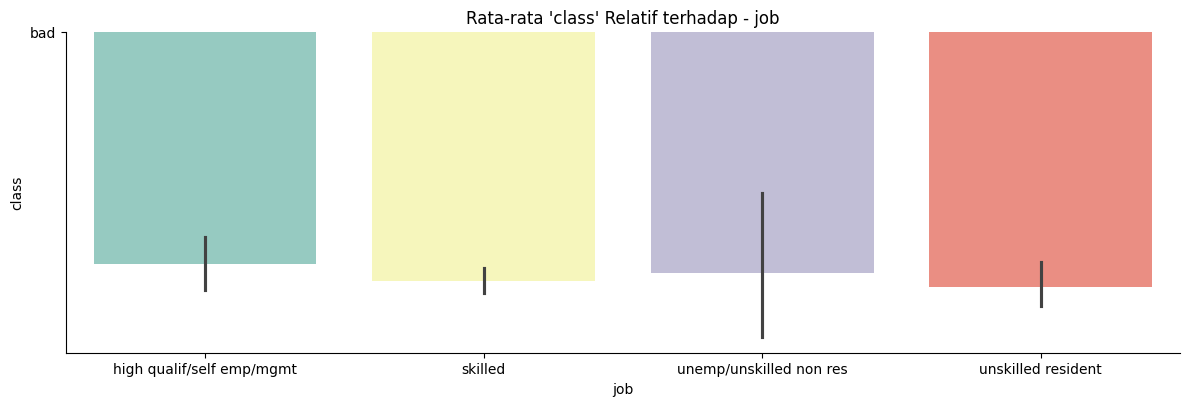

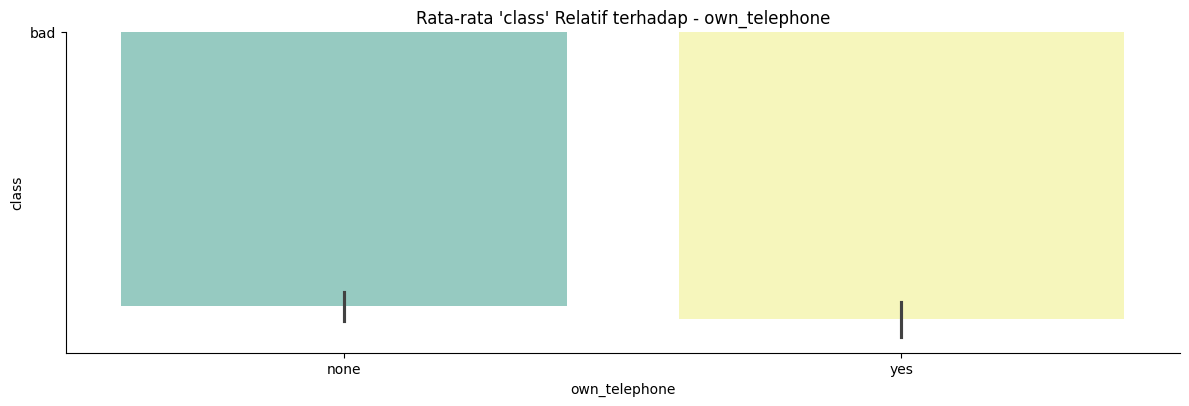

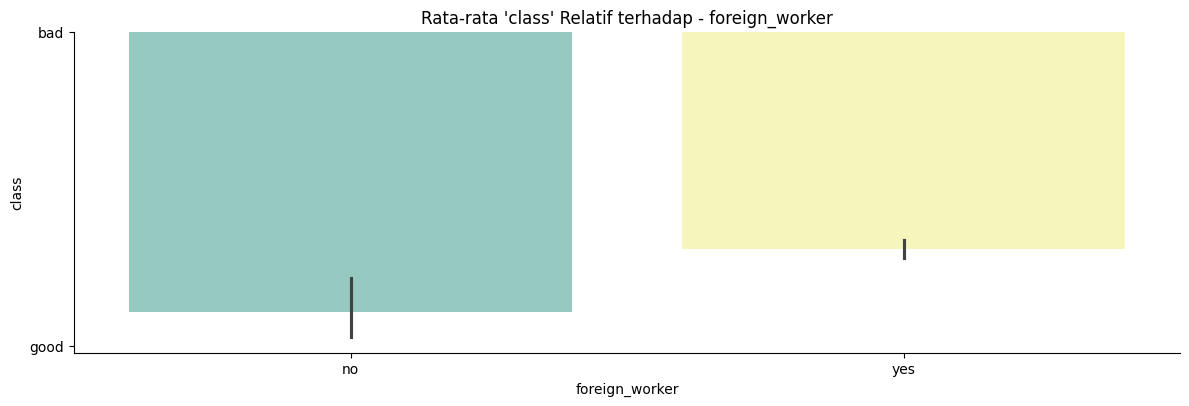

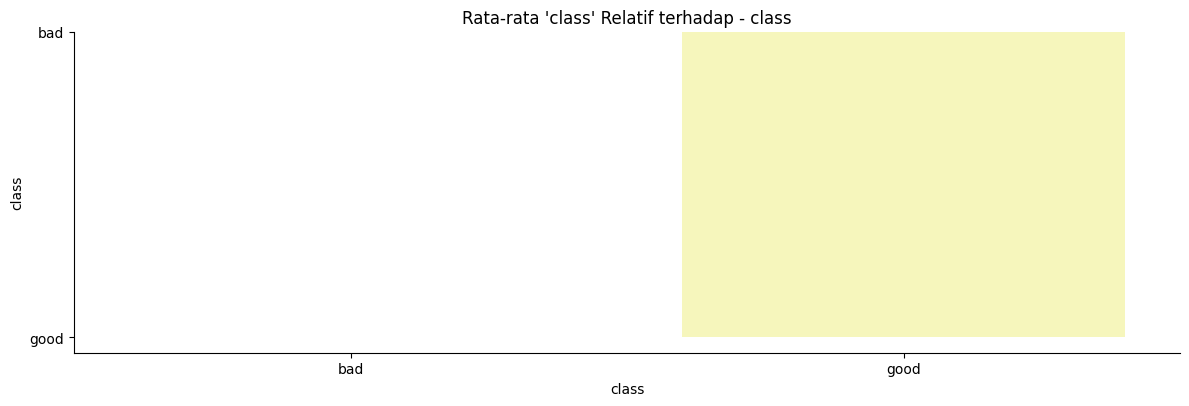

In [11]:
cat_features = credit.select_dtypes(include='category').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="class", kind="bar", dodge=False, height =4, aspect =3, data=credit, palette="Set3")
  plt.title("Rata-rata 'class' Relatif terhadap - {}".format(col))

#####Numerical Values

Membuat visualisasi numerical menggunakan scatter plot

In [12]:
numerical_features = credit.select_dtypes(include='number').columns.to_list()

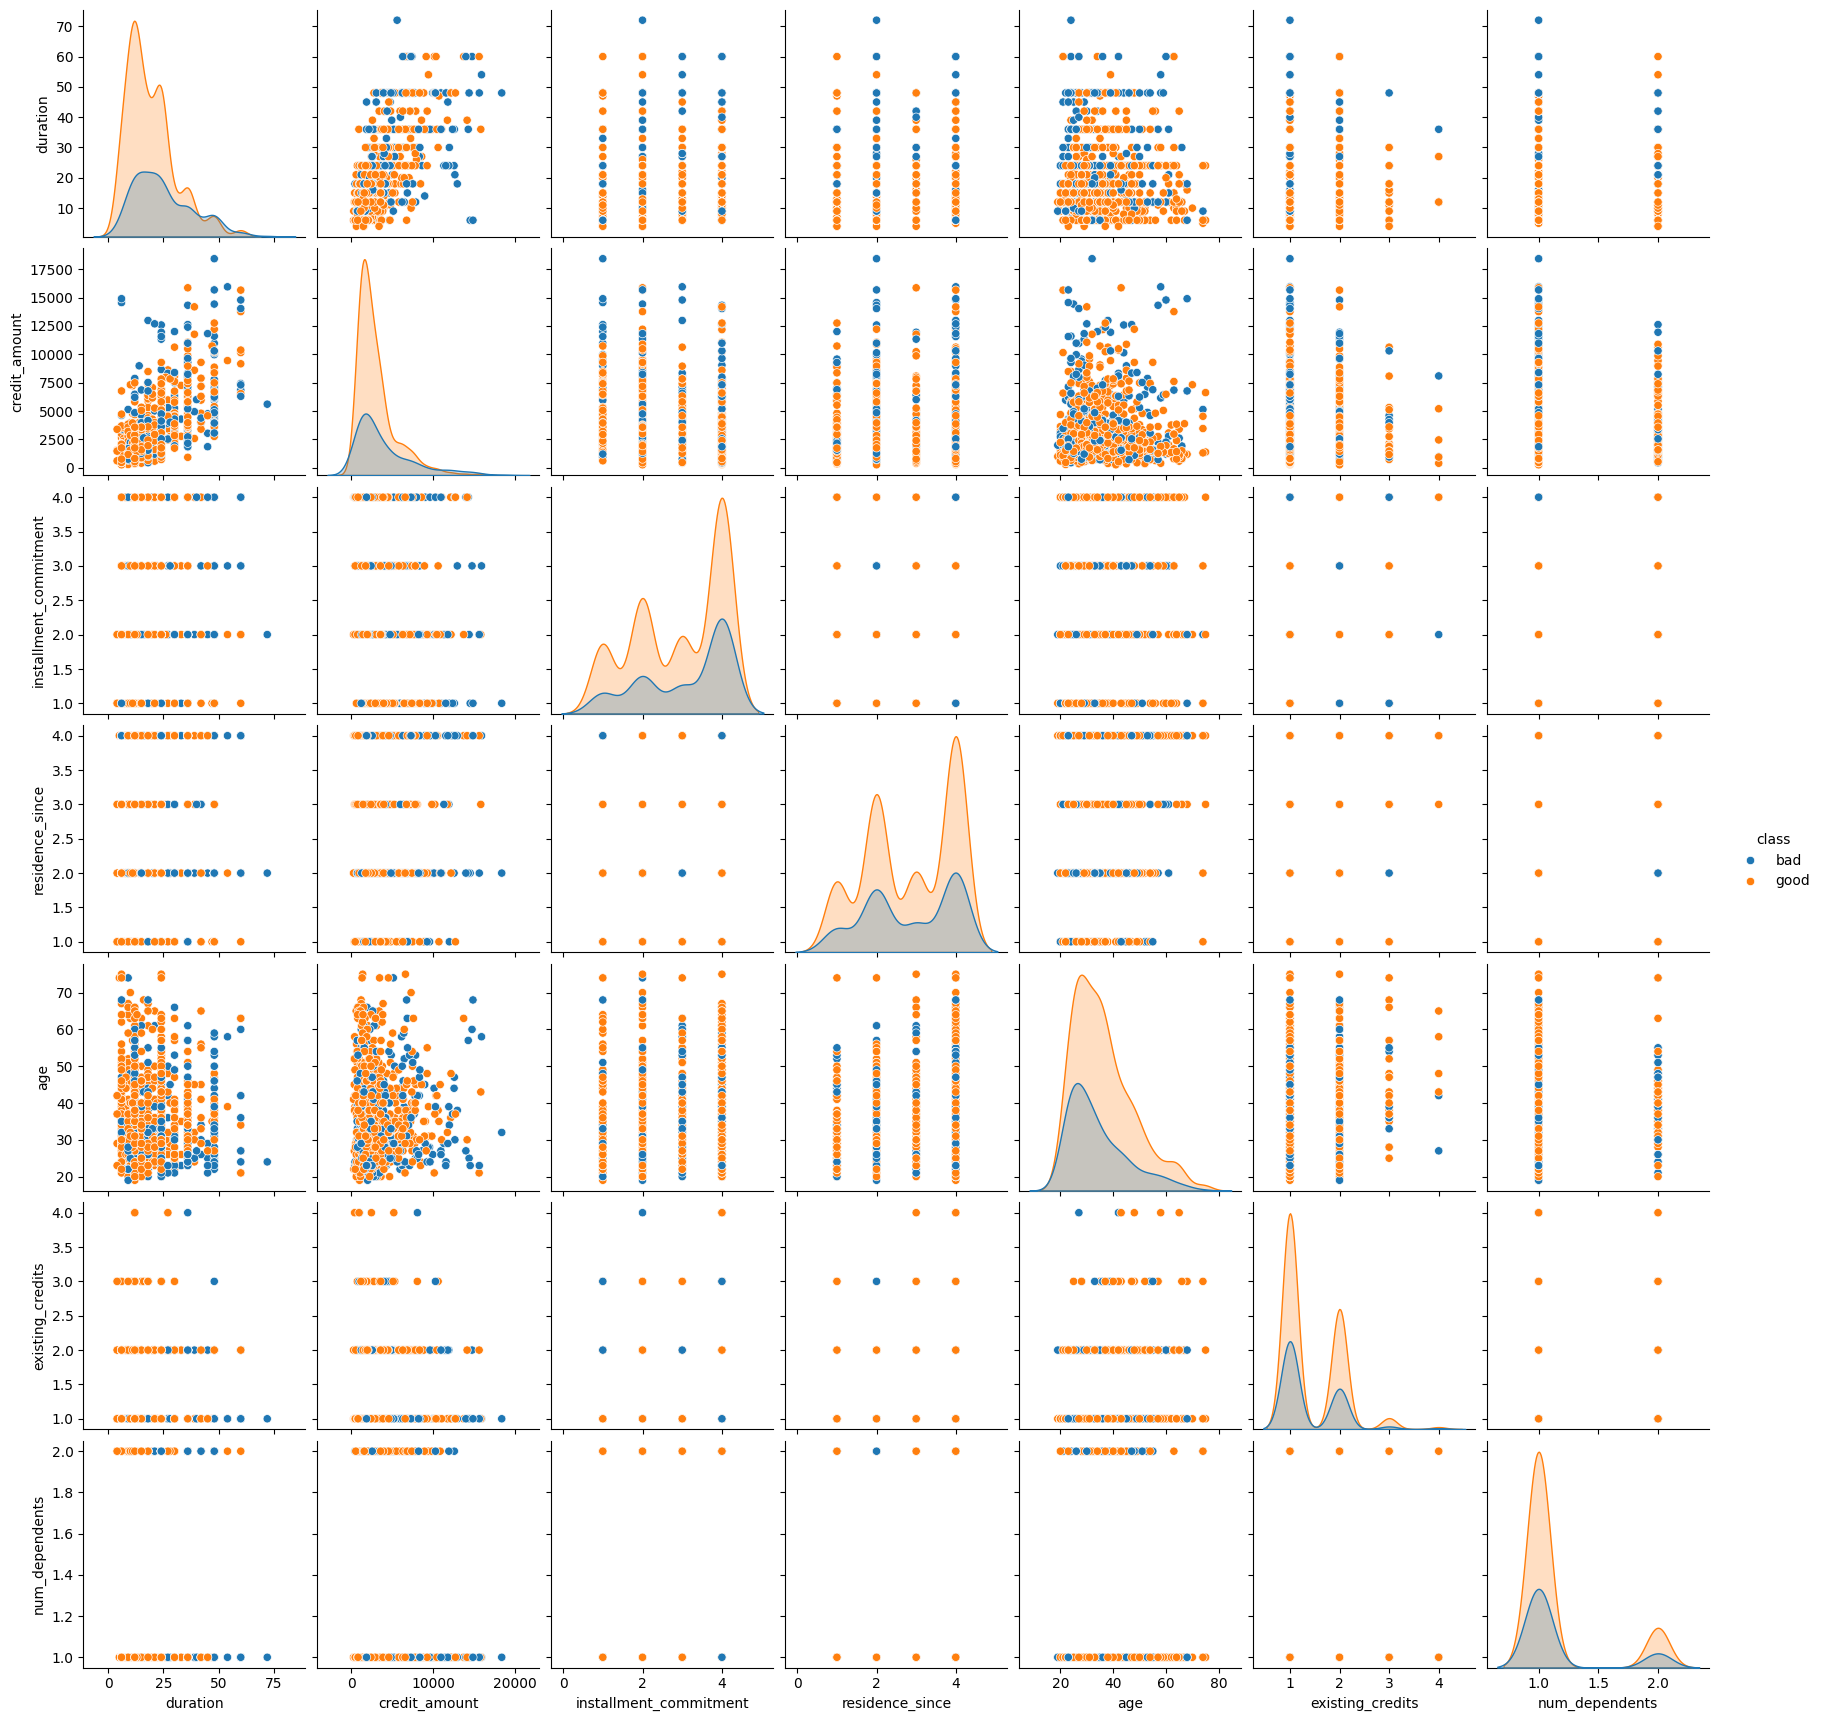

In [13]:
sns.pairplot(data=credit, hue='class')

###Correlation

Melihat hubungan antarvariabel

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

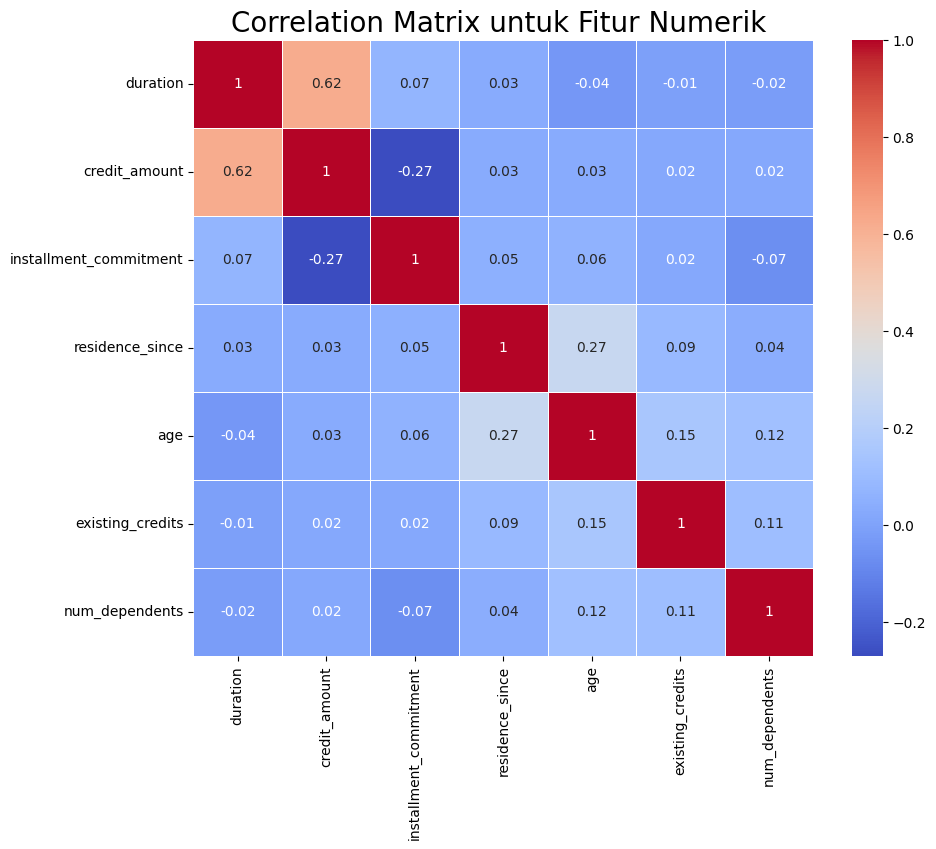

In [14]:
plt.figure(figsize=(10, 8))
correlation_matrix = credit[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

##Data Preparation

Membersihkan data dan mempersiapkan data agar dapat digunakan dalam modeling

####Memeriksa Missing Value

Melakukan pemeriksaan dari data yang hilang

In [15]:
# Cek apakah terdapat baris yang kosong
credit.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [16]:
col_with_unknown = []
unknown_count = (credit == "unknown").sum()
for col, count in unknown_count.items():
    value_count = credit[col].value_counts()
    if count > 0:
        col_with_unknown.append(col)
        print(f"{col} {value_count} \n")

Tidak ada data yang hilang

####Memeriksa data duplikat

Melakukan pemeriksaan data duplikat

In [17]:
#Cek data yang duplikat
jumlah_baris_duplikat = credit.duplicated().sum()
print("Jumlah baris yang memiliki data sama: {} baris".format(jumlah_baris_duplikat))

Jumlah baris yang memiliki data sama: 0 baris


Tidak ada data duplikat

####Outlier Handling

Mencari outlier dan menghapusnya

Gambaran outlier

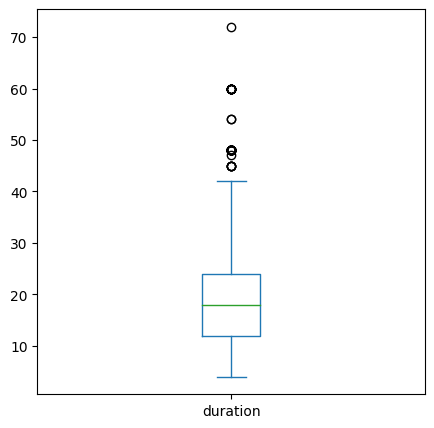

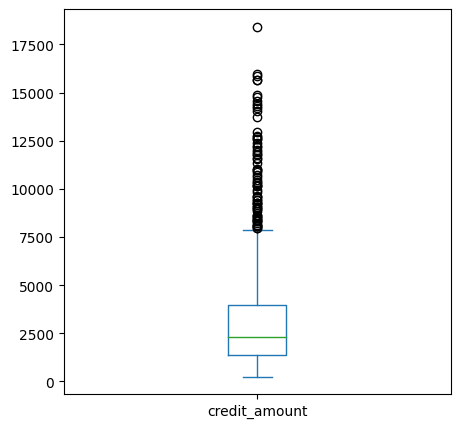

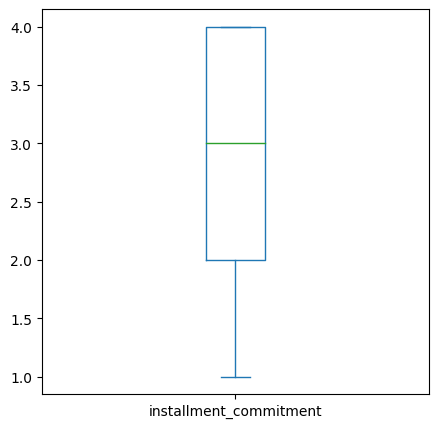

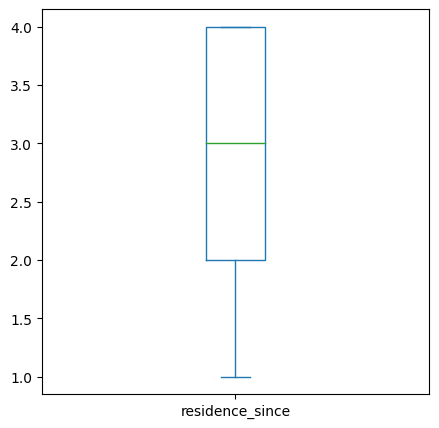

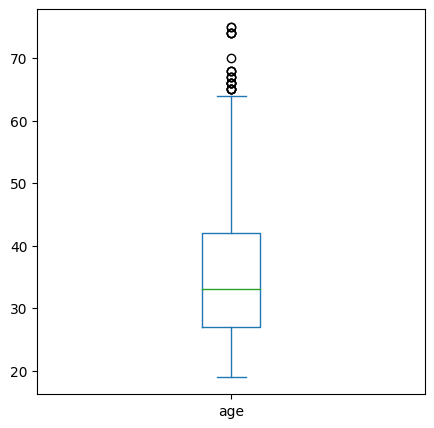

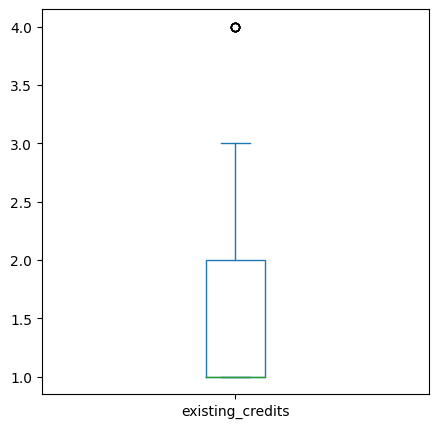

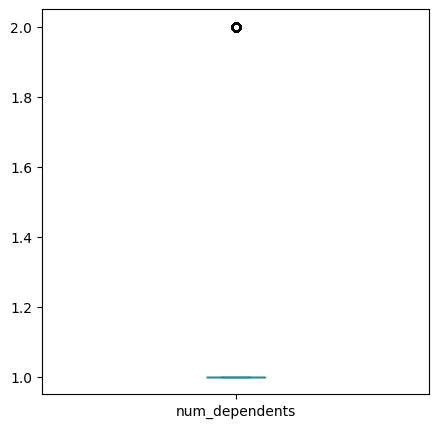

In [18]:
for col in credit.select_dtypes(include="number").columns:
  plt.figure(figsize = (5, 5))
  credit[col].plot(kind="box")
  plt.show()

Menghitung outlier menggunakan Z_score dan menghapus

In [19]:
# threshold value for z-score
threshold = 3

In [20]:
# Menghapus outlier menggunakan Z-score dengan Threshold 3
def remove_outliers_zscore_loop(df, threshold=3):
    credit_process = df.copy()  # Pastikan menggunakan DataFrame yang benar
    outliers = np.ones(len(credit_process), dtype=bool)
    for col in credit_process.select_dtypes(include=np.number).columns:
        z_scores = np.abs((credit_process[col] - credit_process[col].mean()) / credit_process[col].std())
        outliers = outliers & (z_scores <= threshold)  # Gabungkan mask boolean dengan AND
    credit_no_outliers = credit_process[outliers]
    return credit_no_outliers

credit_cleaned = remove_outliers_zscore_loop(credit)
print(credit_cleaned)

    checking_status  duration                  credit_history  \
0                <0       6.0  critical/other existing credit   
1          0<=X<200      48.0                   existing paid   
2       no checking      12.0  critical/other existing credit   
3                <0      42.0                   existing paid   
4                <0      24.0              delayed previously   
..              ...       ...                             ...   
995     no checking      12.0                   existing paid   
996              <0      30.0                   existing paid   
997     no checking      12.0                   existing paid   
998              <0      45.0                   existing paid   
999        0<=X<200      45.0  critical/other existing credit   

                 purpose  credit_amount    savings_status  employment  \
0               radio/tv         1169.0  no known savings         >=7   
1               radio/tv         5951.0              <100      1<=X<4   


tersisa 952 data yang terbebas dari outlier

####Melakukan categorical encoding

Mengubah data categorical menjadi numerical dengan label encoding

In [21]:
credit_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         952 non-null    category
 1   duration                952 non-null    float64 
 2   credit_history          952 non-null    category
 3   purpose                 952 non-null    category
 4   credit_amount           952 non-null    float64 
 5   savings_status          952 non-null    category
 6   employment              952 non-null    category
 7   installment_commitment  952 non-null    float64 
 8   personal_status         952 non-null    category
 9   other_parties           952 non-null    category
 10  residence_since         952 non-null    float64 
 11  property_magnitude      952 non-null    category
 12  age                     952 non-null    float64 
 13  other_payment_plans     952 non-null    category
 14  housing                 952 non

Data categorical di bawah ini dijadikan bilang 1 dan 0

In [22]:
credit_encoded = credit_cleaned.replace({'own_telephone': {'yes': 1, 'none': 0}})
credit_encoded = credit_encoded.replace({'foreign_worker': {'yes': 1, 'no': 0}})
credit_encoded = credit_encoded.replace({'class': {'good': 1, 'bad': 0}})

melakukan label encoding pada variabel categorical lainnya

In [23]:
# Mencari kategori apa saja pada sebuah kolom
kategori_checking_status = credit_cleaned['checking_status'].unique()
kategori_credit_history = credit_cleaned['credit_history'].unique()
kategori_purpose = credit_cleaned['purpose'].unique()
kategori_savings_status = credit_cleaned['savings_status'].unique()
kategori_employment = credit_cleaned['employment'].unique()
kategori_personal_status = credit_cleaned['personal_status'].unique()
kategori_other_parties = credit_cleaned['other_parties'].unique()
kategori_property_magnitude = credit_cleaned['property_magnitude'].unique()
kategori_other_payment_plans = credit_cleaned['other_payment_plans'].unique()
kategori_housing = credit_cleaned['housing'].unique()
kategori_job = credit_cleaned['job'].unique()

print('kategori checking status:',kategori_checking_status)
print('kategori credit history:',kategori_credit_history)
print('kategori purpose:',kategori_purpose)
print('kategori savings status:',kategori_savings_status)
print('kategori employment:',kategori_employment)
print('kategori personal status:',kategori_personal_status)
print('kategori other parties:',kategori_other_parties)
print('kategori property magnitude:',kategori_property_magnitude)
print('kategori other payment plans:',kategori_other_payment_plans)
print('kategori housing:',kategori_housing)
print('kategori job:',kategori_job)

kategori checking status: ['<0', '0<=X<200', 'no checking', '>=200']
Categories (4, object): ['0<=X<200', '<0', '>=200', 'no checking']
kategori credit history: ['critical/other existing credit', 'existing paid', 'delayed previously', 'no credits/all paid', 'all paid']
Categories (5, object): ['all paid', 'critical/other existing credit', 'delayed previously',
                         'existing paid', 'no credits/all paid']
kategori purpose: ['radio/tv', 'education', 'furniture/equipment', 'new car', 'used car', 'business', 'domestic appliance', 'repairs', 'other', 'retraining']
Categories (10, object): ['business', 'domestic appliance', 'education', 'furniture/equipment',
                          ..., 'radio/tv', 'repairs', 'retraining', 'used car']
kategori savings status: ['no known savings', '<100', '500<=X<1000', '>=1000', '100<=X<500']
Categories (5, object): ['100<=X<500', '500<=X<1000', '<100', '>=1000', 'no known savings']
kategori employment: ['>=7', '1<=X<4', '4<=X<7', 'une

In [24]:
for col in credit.select_dtypes(include='category').columns:
  credit_encoded[col] = credit_encoded[col].cat.codes
credit_encoded

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6.0,1,6,1169.0,4,3,4.0,3,2,...,3,67.0,1,1,2.0,1,1.0,1,1,1
1,0,48.0,3,6,5951.0,2,0,2.0,0,2,...,3,22.0,1,1,1.0,1,1.0,0,1,0
2,3,12.0,1,2,2096.0,2,1,2.0,3,2,...,3,49.0,1,1,1.0,3,2.0,0,1,1
3,1,42.0,3,3,7882.0,2,1,2.0,3,1,...,1,45.0,1,0,1.0,1,2.0,0,1,1
4,1,24.0,2,4,4870.0,2,0,3.0,3,2,...,2,53.0,1,0,2.0,1,2.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12.0,3,3,1736.0,2,1,3.0,0,2,...,3,31.0,1,1,1.0,3,1.0,0,1,1
996,1,30.0,3,9,3857.0,2,0,4.0,1,2,...,1,40.0,1,1,1.0,0,1.0,1,1,1
997,3,12.0,3,6,804.0,2,3,4.0,3,2,...,0,38.0,1,1,1.0,1,1.0,0,1,1
998,1,45.0,3,6,1845.0,2,0,4.0,3,2,...,2,23.0,1,0,1.0,1,1.0,1,1,0


####Visualisasi setelah pembersihan data

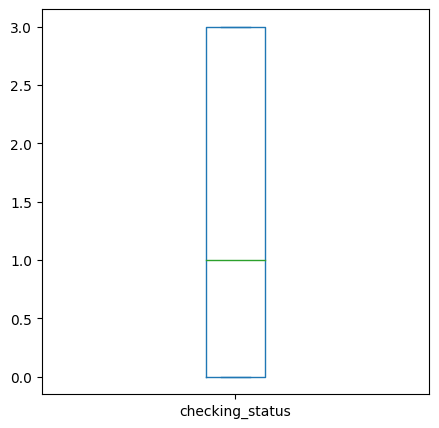

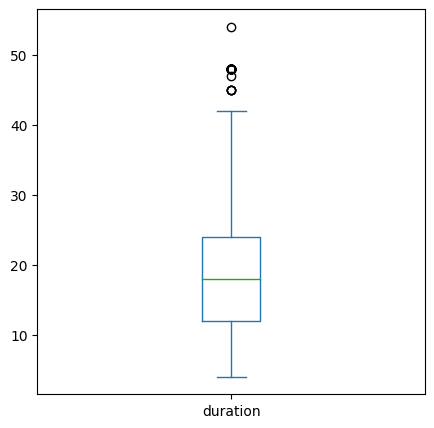

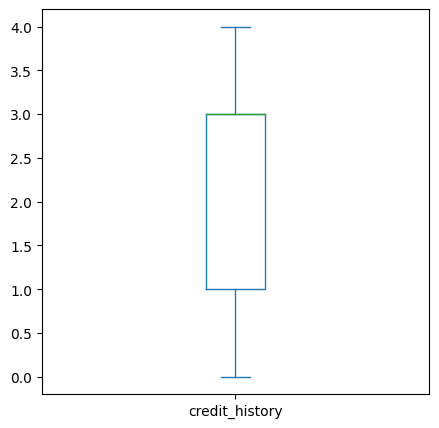

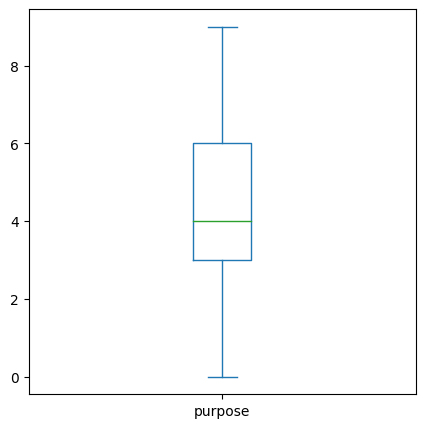

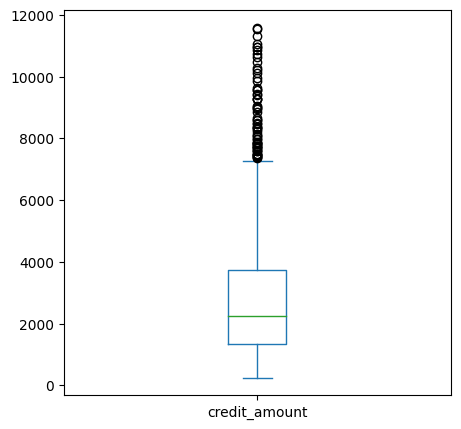

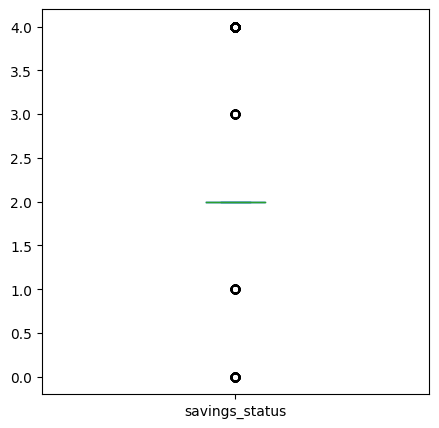

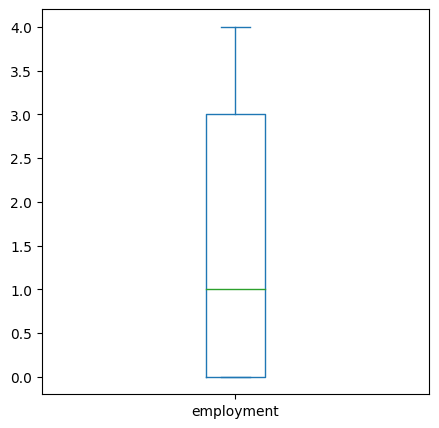

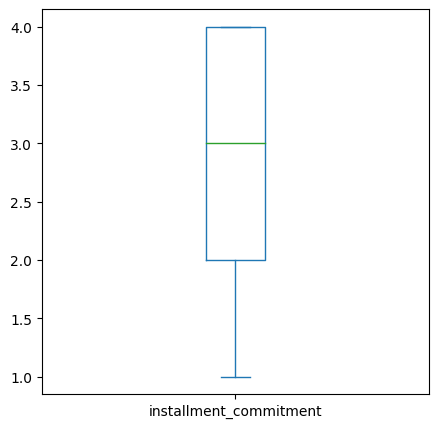

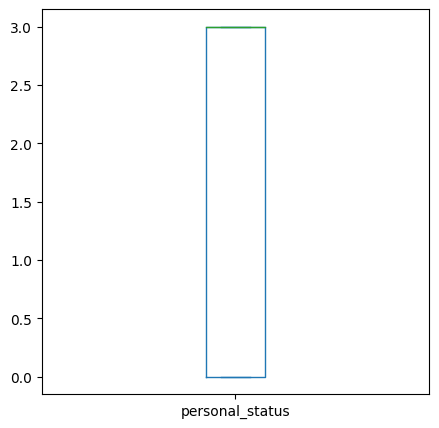

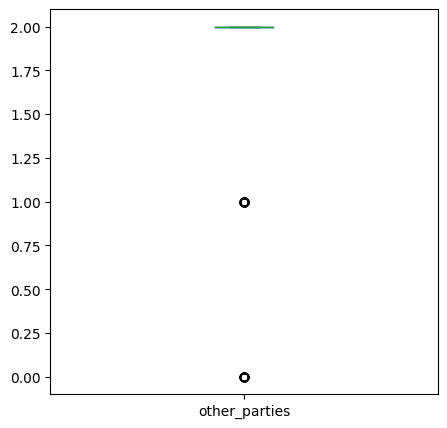

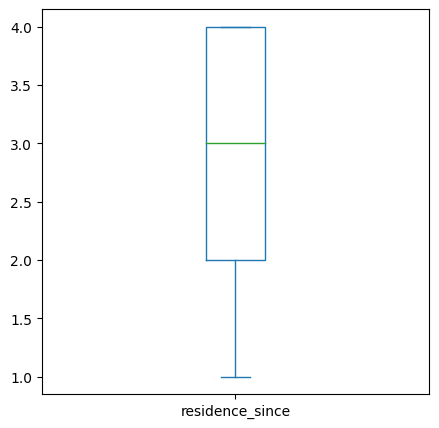

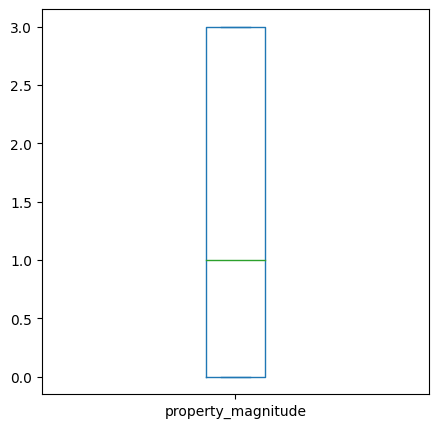

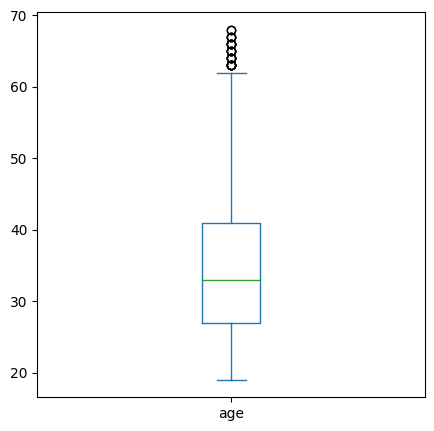

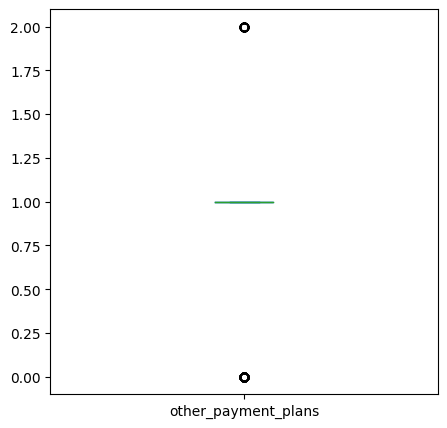

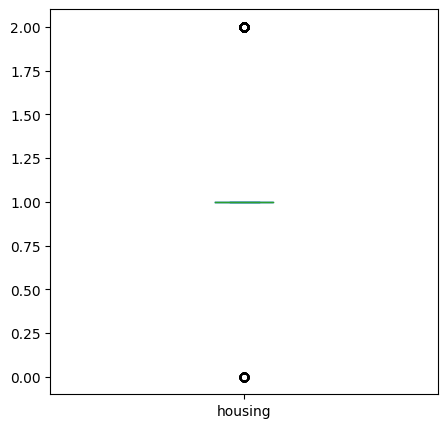

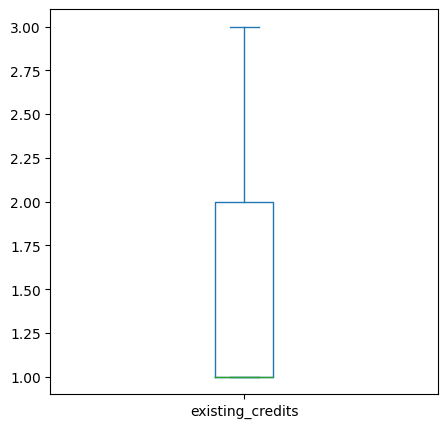

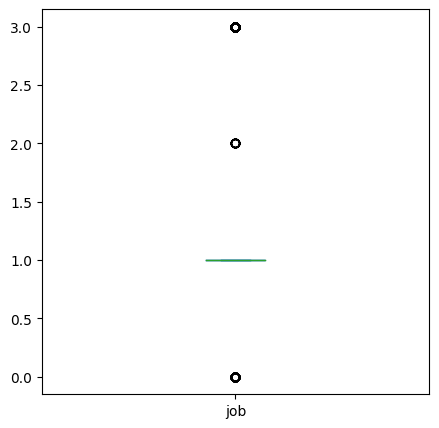

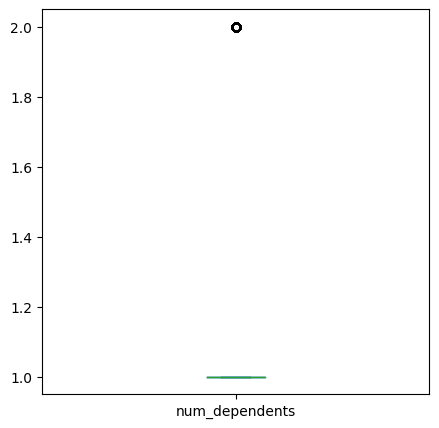

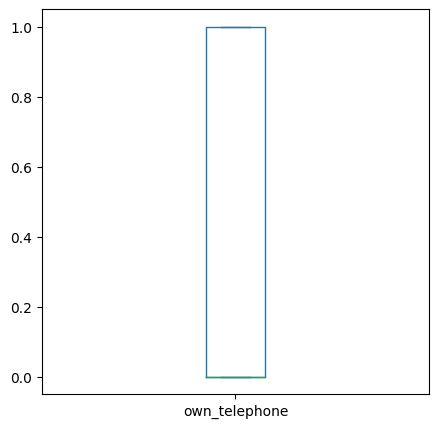

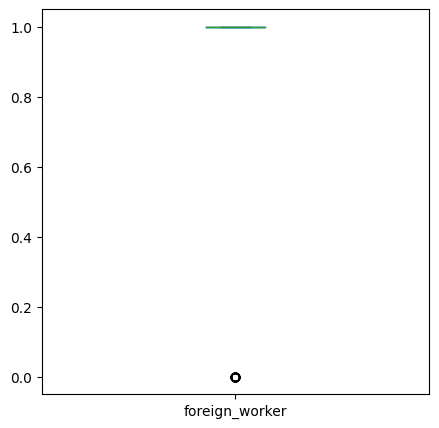

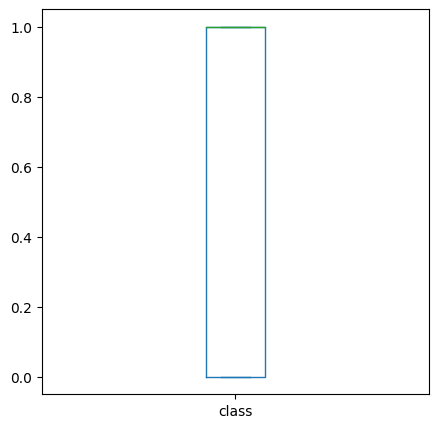

In [25]:
for col in credit_encoded.select_dtypes(include="number").columns:
  plt.figure(figsize = (5, 5))
  credit_encoded[col].plot(kind="box")
  plt.show()

<Figure size 1000x1000 with 0 Axes>

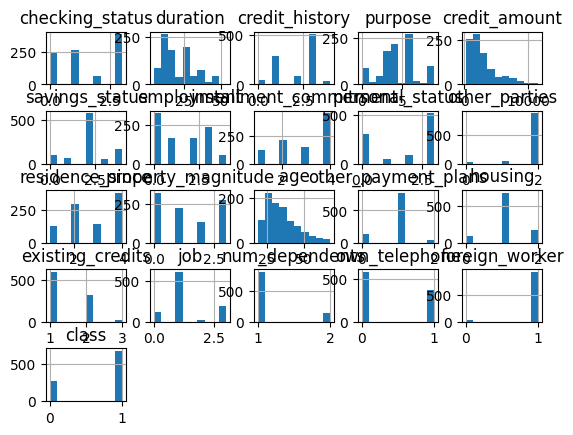

In [26]:
plt.figure(figsize = (10, 10))
credit_encoded.hist()
plt.subplots_adjust(hspace=0.5)
plt.show()

####Korelasi Setelah pembersihan data

Berikut merupakan korelasi setelah pembersihan data

In [27]:
credit_encoded= credit_encoded.astype('int64')

In [28]:
credit_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   checking_status         952 non-null    int64
 1   duration                952 non-null    int64
 2   credit_history          952 non-null    int64
 3   purpose                 952 non-null    int64
 4   credit_amount           952 non-null    int64
 5   savings_status          952 non-null    int64
 6   employment              952 non-null    int64
 7   installment_commitment  952 non-null    int64
 8   personal_status         952 non-null    int64
 9   other_parties           952 non-null    int64
 10  residence_since         952 non-null    int64
 11  property_magnitude      952 non-null    int64
 12  age                     952 non-null    int64
 13  other_payment_plans     952 non-null    int64
 14  housing                 952 non-null    int64
 15  existing_credits        952 

In [29]:
credit_encoded.corrwith(credit_encoded["class"]).sort_values(ascending=False)

class                     1.000000
checking_status           0.280137
purpose                   0.137121
age                       0.100765
personal_status           0.092527
savings_status            0.089145
own_telephone             0.058552
property_magnitude        0.052421
other_payment_plans       0.046405
existing_credits          0.041575
other_parties             0.029591
job                       0.016000
residence_since           0.002529
num_dependents           -0.001586
employment               -0.002066
housing                  -0.033706
credit_history           -0.082260
foreign_worker           -0.087568
installment_commitment   -0.088645
credit_amount            -0.091938
duration                 -0.207063
dtype: float64

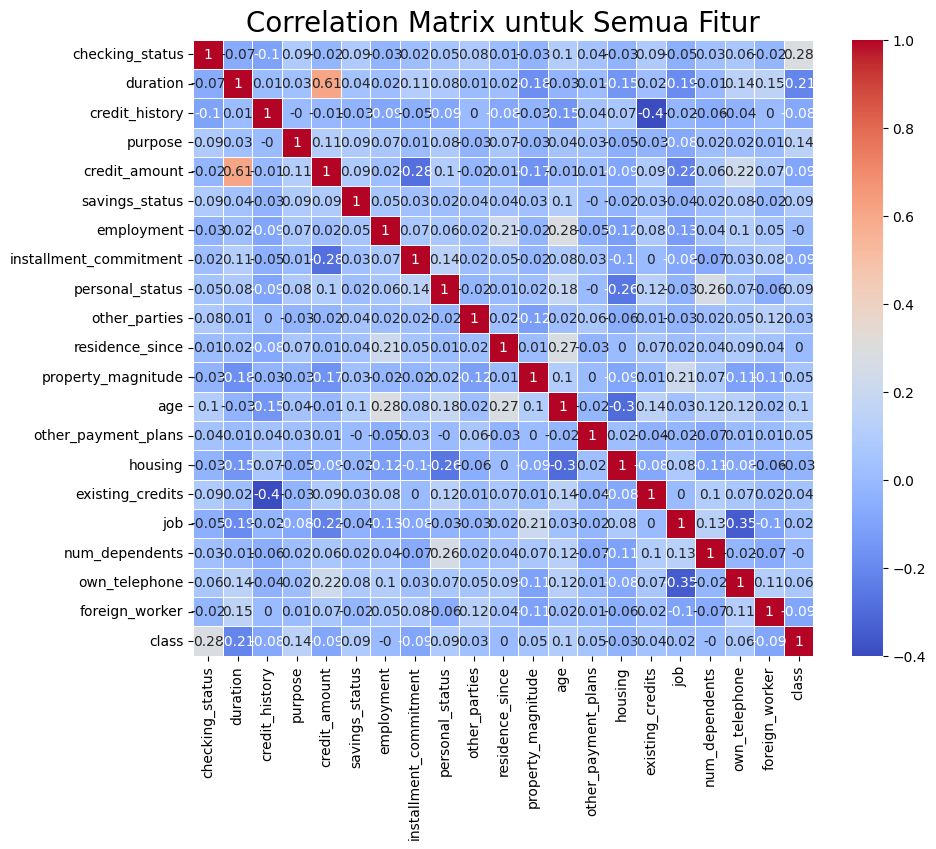

                        checking_status  duration  credit_history  purpose  \
checking_status                    1.00     -0.07           -0.10     0.09   
duration                          -0.07      1.00            0.01     0.03   
credit_history                    -0.10      0.01            1.00    -0.00   
purpose                            0.09      0.03           -0.00     1.00   
credit_amount                     -0.02      0.61           -0.01     0.11   
savings_status                     0.09      0.04           -0.03     0.09   
employment                        -0.03      0.02           -0.09     0.07   
installment_commitment             0.02      0.11           -0.05     0.01   
personal_status                    0.05      0.08           -0.09     0.08   
other_parties                      0.08      0.01            0.00    -0.03   
residence_since                    0.01      0.02           -0.08     0.07   
property_magnitude                -0.03     -0.18           -0.0

In [30]:
correlation_matrix = credit_encoded.corr().round(2)

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Semua Fitur", size=20)
plt.show()

# Menampilkan matriks korelasi
print(correlation_matrix)

Berdasarkan hasil tidak ada variabel yang memiliki korelasi kuat baik positif atau negatif namun terdapat yang lebih kuat dari yang lainnya, yaitu untuk positif adalah checking_status, purpose, dan age. Sedangkan untik negatif adalah credit_history, foreign worker, installment commitment, credit_amount, dan duration.

####PCA

Dilakukan untuk mereduksi dimensi

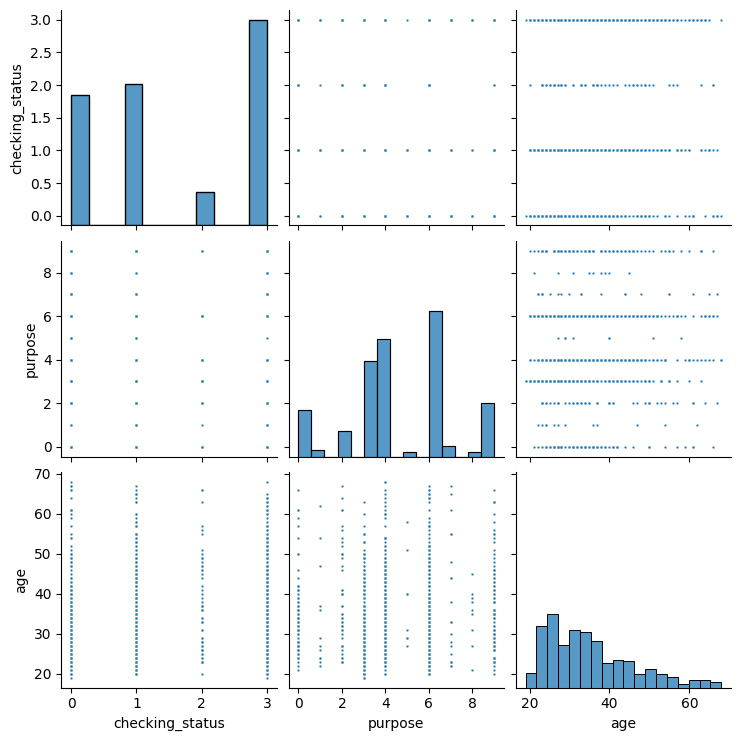

In [31]:
sns.pairplot(credit_encoded[['checking_status','purpose','age']], plot_kws={"s": 3});

In [32]:
pca = PCA(n_components=3, random_state=123)
pca.fit(credit_encoded[['checking_status','purpose','age']])
princ_comp = pca.transform(credit_encoded[['checking_status','purpose','age']])

In [33]:
pca.explained_variance_ratio_.round(3)

array([0.941, 0.047, 0.012])

Menggabungkan tiga variabel menjadi satu saja yang menggambarkan ketiga agar dimensi mengecil

In [34]:
pca=PCA(n_components=1, random_state=123)
pca.fit(credit_encoded[['checking_status','purpose','age']])
credit_encoded['PCA'] = pca.transform(credit_encoded.loc[:,('checking_status','purpose','age')]).flatten()
credit_encoded.drop(['checking_status','purpose','age'], axis=1, inplace=True)

In [35]:
credit_encoded.head()

,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,PCA
0,6,1,1169,4,3,4,3,2,4,3,1,1,2,1,1,1,1,1,31.893357
1,48,3,5951,2,0,2,0,2,2,3,1,1,1,1,1,0,1,0,-13.112699
2,12,1,2096,2,1,2,3,2,3,3,1,1,1,3,2,0,1,1,13.876531
3,42,3,7882,2,1,2,3,1,4,1,1,0,1,1,2,0,1,1,9.864433
4,24,2,4870,2,0,3,3,2,4,2,1,0,2,1,2,0,1,0,17.873992


####Data Balancing

Penyeimbangan data variabel class karena condong ke arah risiko kredit baik

In [36]:
credit_encoded['class'].value_counts()

class
1    677
0    275
Name: count, dtype: int64

In [37]:
X = credit_encoded.drop('class', axis=1)
y = credit_encoded['class']

In [38]:
balancer = RandomOverSampler(random_state=42)
X_balanced, y_balanced = balancer.fit_resample(X, y)
y_balanced.value_counts()

class
1    677
0    677
Name: count, dtype: int64

####Data Splitting

Pembagian data menjadi dataset training dan dataset testing

In [39]:
from sklearn.model_selection import train_test_split

X = X_balanced
y = y_balanced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [40]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset:{len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1354
Total # of sample in train dataset:1083
Total # of sample in test dataset: 271


####Feature Scaling

Melakukan standarisasi atau normalisasi agar persebaran data tidak berbeda antar satu variabel dengan variabel lainnya

In [41]:
X.describe()

,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,PCA
count,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.00000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000
mean,21.223043,2.261448,3089.198671,2.109306,1.497784,3.051699,1.81610,1.847858,2.832349,1.347120,0.893648,1.102659,1.395864,1.291728,1.156573,0.377400,0.969719,-0.357874
std,11.260427,1.095394,2389.298663,1.065422,1.327545,1.101763,1.36453,0.476079,1.098593,1.195228,0.447284,0.554982,0.546315,0.941672,0.363532,0.484915,0.171422,10.823787
min,4.000000,0.000000,250.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-16.143948
25%,12.000000,1.000000,1343.250000,2.000000,0.000000,2.000000,0.00000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-9.078499
50%,18.000000,3.000000,2281.500000,2.000000,1.000000,4.000000,3.00000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-3.079233
75%,24.000000,3.000000,3975.250000,2.000000,3.000000,4.000000,3.00000,2.000000,4.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,5.864666
max,54.000000,4.000000,11590.000000,4.000000,4.000000,4.000000,3.00000,2.000000,4.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,1.000000,1.000000,32.895283


In [42]:
scaler = StandardScaler()
X_train['duration'] = scaler.fit_transform(X_train[['duration']]) # "fit" on the TRAIN set only, then transform
X_test['duration'] = scaler.transform(X_test[['duration']]) # while on the TEST set, just "transform" it

X_train['credit_amount'] = scaler.fit_transform(X_train[['credit_amount']])
X_test['credit_amount'] = scaler.transform(X_test[['credit_amount']])

X_train['PCA'] = scaler.fit_transform(X_train[['PCA']])
X_test['PCA'] = scaler.transform(X_test[['PCA']])


X_train.describe()

,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,PCA
count,1.083000e+03,1083.000000,1.083000e+03,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1.083000e+03
mean,1.968262e-17,2.275162,-1.148153e-17,2.114497,1.479224,3.074792,1.828255,1.841182,2.823638,1.360111,0.903047,1.104340,1.385965,1.286242,1.154201,0.379501,0.969529,9.841312e-18
std,1.000462e+00,1.086806,1.000462e+00,1.077326,1.321751,1.080384,1.362305,0.490843,1.105905,1.198257,0.441410,0.564843,0.537560,0.934680,0.361308,0.485487,0.171959,1.000462e+00
min,-1.558865e+00,0.000000,-1.211568e+00,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-1.433725e+00
25%,-8.477232e-01,1.000000,-7.403001e-01,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-7.887479e-01
50%,-3.143668e-01,3.000000,-3.395740e-01,2.000000,1.000000,4.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-2.397045e-01
75%,2.189897e-01,3.000000,4.030229e-01,2.000000,3.000000,4.000000,3.000000,2.000000,4.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,5.856156e-01
max,2.885772e+00,4.000000,3.607344e+00,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,1.000000,1.000000,3.063321e+00


##Model Development

###Decision Tree

In [43]:
# Membuat model Decision Tree
dtree = DecisionTreeClassifier()

# Membuat grid parameter yang akan diuji
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')

# Melakukan pencarian parameter terbaik pada data latih
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [54]:
# Inisialisasi model Decision Tree dengan parameter yang disebutkan
dtree = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
f1_score_dtree = f1_score(y_test, y_pred)
roc_auc_dtree = roc_auc_score(y_test, y_pred)
accuracy_dtree = accuracy_score(y_test, y_pred)
print(f"F1-score: {f1_score_dtree}")
print(f"ROC-AUC Score: {roc_auc_dtree}\n")
print('Accuracy:', accuracy_dtree)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))

F1-score: 0.7953667953667954
ROC-AUC Score: 0.8055192328647707

Accuracy: 0.8044280442804428
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       133
           1       0.85      0.75      0.80       138

    accuracy                           0.80       271
   macro avg       0.81      0.81      0.80       271
weighted avg       0.81      0.80      0.80       271



###K-Nearest Neighbor

In [45]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X, y)
print("Parameter terbaik:", grid_search.best_params_)
print("Skor validasi terbaik:", grid_search.best_score_)

Parameter terbaik: {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
Skor validasi terbaik: 0.819087057537242


In [46]:
knn = KNeighborsClassifier(n_neighbors=1, p=2, weights="uniform")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
f1_score_knn = f1_score(y_test, y_pred)
roc_auc_knn = roc_auc_score(y_test, y_pred)
accuracy_knn = accuracy_score(y_test, y_pred)
print(f"F1-score: {f1_score_knn}")
print(f"ROC-AUC Score: {roc_auc_knn}\n")
print('Accuracy:', accuracy_knn)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))

F1-score: 0.8365019011406845
ROC-AUC Score: 0.8421597471940722

Accuracy: 0.8413284132841329
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       133
           1       0.88      0.80      0.84       138

    accuracy                           0.84       271
   macro avg       0.84      0.84      0.84       271
weighted avg       0.84      0.84      0.84       271



###Backpropagation Neural Network

In [47]:
nn = MLPClassifier(activation="relu", solver="sgd", alpha=0.001)
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)
f1_score_nn = f1_score(y_test, y_pred)
roc_auc_nn = roc_auc_score(y_test, y_pred)
accuracy_nn = accuracy_score(y_test, y_pred)
print(f"F1-score: {f1_score_nn}")
print(f"ROC-AUC Score: {roc_auc_nn}\n")
print('Accuracy:', accuracy_nn)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))

F1-score: 0.6666666666666666
ROC-AUC Score: 0.6487141767462133

Accuracy: 0.6494464944649446
Classification report:
               precision    recall  f1-score   support

           0       0.65      0.61      0.63       133
           1       0.65      0.69      0.67       138

    accuracy                           0.65       271
   macro avg       0.65      0.65      0.65       271
weighted avg       0.65      0.65      0.65       271



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


###Random Forest

In [48]:
# Tentukan model Random Forest
rf = RandomForestClassifier()

# Tentukan parameter yang akan diuji
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Gunakan  Randomized Search untuk mencari parameter terbaik
random_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=123, n_jobs=-1)

# Latih Data
random_search.fit(X_train, y_train)

#Cetak Parameter terbaik
best_params = random_search.best_params_
print("Parameter Terbaik:", best_params)

# Model dengan parameter terbaik
best_model = random_search.best_estimator_

Parameter Terbaik: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 40}


In [49]:
rf = RandomForestClassifier(n_estimators= 300, min_samples_split= 2, min_samples_leaf= 2, max_depth= 40)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
f1_score_rf = f1_score(y_test, y_pred)
roc_auc_rf = roc_auc_score(y_test, y_pred)
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"F1-score: {f1_score_rf}")
print(f"ROC-AUC Score: {roc_auc_rf}\n")
print('Accuracy:', accuracy_rf)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))

F1-score: 0.8571428571428571
ROC-AUC Score: 0.8562438705459301

Accuracy: 0.8560885608856088
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       133
           1       0.87      0.85      0.86       138

    accuracy                           0.86       271
   macro avg       0.86      0.86      0.86       271
weighted avg       0.86      0.86      0.86       271



###Logistic Regression

In [50]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Variasi parameter C
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga', 'newton-cholesky' ]  # Variasi solver
}

# Membuat objek model Regresi Logistik
logreg = LogisticRegression(random_state=123)

# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Melatih model dengan parameter terbaik
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Parameter terbaik: {'C': 1, 'solver': 'liblinear'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [51]:
logreg = LogisticRegression(C=1, solver='liblinear', random_state=123)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
f1_score_logreg = f1_score(y_test, y_pred)
roc_auc_logreg = roc_auc_score(y_test, y_pred)
accuracy_logreg = accuracy_score(y_test, y_pred)
print(f"F1-score: {f1_score_logreg}")
print(f"ROC-AUC Score: {roc_auc_logreg}\n")
print('Accuracy:', accuracy_logreg)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))

F1-score: 0.6334519572953737
ROC-AUC Score: 0.6194562493189495

Accuracy: 0.6199261992619927
Classification report:
               precision    recall  f1-score   support

           0       0.62      0.59      0.61       133
           1       0.62      0.64      0.63       138

    accuracy                           0.62       271
   macro avg       0.62      0.62      0.62       271
weighted avg       0.62      0.62      0.62       271



##Evaluasi Model

In [55]:
metode = ["Decision Tree", "K-Nearest Neighbor",  "Neural Networks", "Random Forest", "Logistic Regression"]
f1_score_test = [f1_score_dtree, f1_score_knn, f1_score_nn,  f1_score_rf, f1_score_logreg]
roc_auc_score_test = [roc_auc_dtree, roc_auc_knn,  roc_auc_nn, roc_auc_rf, roc_auc_logreg]
accuracy_score_test = [accuracy_dtree, accuracy_knn,  accuracy_nn, accuracy_rf, accuracy_logreg]

# Membuat DataFrame
data = {
    "Metode": metode,
    "F1-Score Test": f1_score_test,
    "ROC-AUC Score Test": roc_auc_score_test,
    "Accuracy Score Test": accuracy_score_test,

}

Model_selection = pd.DataFrame(data)
Model_selection

,Metode,F1-Score Test,ROC-AUC Score Test,Accuracy Score Test
0,Decision Tree,0.795367,0.805519,0.804428
1,K-Nearest Neighbor,0.836502,0.842160,0.841328
2,Neural Networks,0.666667,0.648714,0.649446
3,Random Forest,0.857143,0.856244,0.856089
4,Logistic Regression,0.633452,0.619456,0.619926


Berdasarkan hasil didapatkan bahwa Random Forest memberikan hasil terbaik untuk seluruh metrik evaluasi yaitu 0.567